## Final Project Submission

Please fill out:
* Student name: Neha Patel
* Student pace: part time
* Scheduled project review date/time: 10/10/2020, 2:30 pm CST
* Instructor name: James Irving
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!

## Business Case

Formation Evaluation has played an important role in many industries including but not limited to oil & gas, geothermal, and mining. These industries for long have utilized large and complex data to analyze and make their predictions. This analysis is especially important in the exploration stage of most processes. Till now, certain tools and techniques have been used across various industries to deal with big data. However these processes are cumbersome and is difficult to achieve utmost accuracy while also speeding up the process. 
> This is where the demand of data science rises in hopes of developing a tool/model that can accurately fill in the gaps.

One aspect of Formation evaluation is determining the facies of a certain rock formation based on the log readings measured during the exploration process. Facies determine the properties of that formation, the result of which is important to determine the presence of oil/gas/water, geothermal properties, etc. The most common logs used for facies determination are Gamma Ray, Resistivity, Neutron Density, and photoelectric.
>Different facies show different values for each log measurement.

Thus, analyzing the combined values will help classify each data point at a given depth and thus determine the facies at that depth.
>The final model from this project will help accurately classify each point at a given depth into different facies that would further help to separate the formation into layers and aid the exploration process.

## Methodology

- Exploring the data set: Explore data properties, descripancy, missing data, duplicates, data types, etc.
- Spliting our data into training, testing, and validation sets to avoid bias
- Preprocessing
- Analysis of different models and feature importances
- selecting the best model and explain feature correlations
- Give educated recommendations based off the best model

The target variable has 9 classes numbered 1-9, each denoting a facies. These are described as below:

>**1** : Non-Marine Sandstone <br /> 
**2**: Non-Marine Coarse Siltstone <br />
**3**: Non-Marine Fine Siltstone <br />
**4**: Marine siltstone and shale <br />
**5**: Mudstone (Limestone) <br />
**6**: Wackestone (Limestone) <br />
**7**: Dolomite <br />
**8**: Packstone - Grainstone (Limestone) <br />
**9**: Phylloid-algal bafflestone (Limestone) <br />

The predictors used are the log reading acquired during logging operations. 
>The logs included in this data are: <br />
- Gamma Ray (GR)
- Resistivity (ILD_log10)
- Photoelectric Effect (PE)
- Neutron-Density Porosity Difference (DeltaPHI)
- Neutron-Density Porosity (PHID) <br />

Other Predictors include Depth, Nonmarine-Marine Indicator (NM_M), and relative position.

Formation and well names have also been included for the knowledge of geographical location. This will ensure the extension of this project to other geographical locations.

## Libraries

In [226]:
# !pip install yellowbrick
# !pip install eli5
# !pip install ipywidgets

In [227]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomTreesEmbedding,StackingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassPredictionError,class_prediction_error
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.target import FeatureCorrelation,feature_correlation
from yellowbrick.features import rank1d, rank2d, JointPlotVisualizer,joint_plot
import eli5
from ipywidgets import interact

## Exploring Data

In [5]:
#Loading the dataset
df = pd.read_csv('training_data.csv')
df.head()

Facies Formation  Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       3     A1 SH  SHRIMPLIN  2793.0  77.45      0.664       9.9  11.915   
1       3     A1 SH  SHRIMPLIN  2793.5  78.26      0.661      14.2  12.565   
2       3     A1 SH  SHRIMPLIN  2794.0  79.05      0.658      14.8  13.050   
3       3     A1 SH  SHRIMPLIN  2794.5  86.10      0.655      13.9  13.115   
4       3     A1 SH  SHRIMPLIN  2795.0  74.58      0.647      13.5  13.300   

    PE  NM_M  RELPOS  
0  4.6     1   1.000  
1  4.1     1   0.979  
2  3.6     1   0.957  
3  3.5     1   0.936  
4  3.4     1   0.915

In [6]:
#Exploring the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
Facies       3232 non-null int64
Formation    3232 non-null object
Well Name    3232 non-null object
Depth        3232 non-null float64
GR           3232 non-null float64
ILD_log10    3232 non-null float64
DeltaPHI     3232 non-null float64
PHIND        3232 non-null float64
PE           3232 non-null float64
NM_M         3232 non-null int64
RELPOS       3232 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


### Nulls
It looks like there are no null values in the dataset. Although, just to be extra sure, we use `df.isna().sum()`

In [8]:
df.isna().sum()

Facies       0
Formation    0
Well Name    0
Depth        0
GR           0
ILD_log10    0
DeltaPHI     0
PHIND        0
PE           0
NM_M         0
RELPOS       0
dtype: int64

### Duplicates

In [9]:
df[df.duplicated()]

Facies Formation  Well Name   Depth     GR  ILD_log10  DeltaPHI  PHIND  \
302       8     B5 LM  SHRIMPLIN  2944.0  234.8      0.515       4.7  11.41   

      PE  NM_M  RELPOS  
302  4.8     2     0.4

In [10]:
df[df.duplicated(keep=False)]

Facies Formation  Well Name   Depth     GR  ILD_log10  DeltaPHI  PHIND  \
301       8     B5 LM  SHRIMPLIN  2944.0  234.8      0.515       4.7  11.41   
302       8     B5 LM  SHRIMPLIN  2944.0  234.8      0.515       4.7  11.41   

      PE  NM_M  RELPOS  
301  4.8     2     0.4  
302  4.8     2     0.4

While one duplicate row wouldn't affect our model, however, we would like to remove it to avoid the slightest possibility of bias.

In [11]:
#Removing the duplicate entry
df.drop_duplicates(inplace = True)

In [12]:
#Check
df.loc[df.index[301:303]]

Facies Formation  Well Name   Depth      GR  ILD_log10  DeltaPHI   PHIND  \
301       8     B5 LM  SHRIMPLIN  2944.0  234.80      0.515       4.7  11.410   
303       8     B5 LM  SHRIMPLIN  2944.5  273.48      0.538       5.3  10.045   

      PE  NM_M  RELPOS  
301  4.8     2    0.40  
303  5.1     2    0.35

### Evaluating Categorical and Numerical Features

In [13]:
df.describe()

Facies        Depth           GR    ILD_log10     DeltaPHI  \
count  3231.000000  3231.000000  3231.000000  3231.000000  3231.000000   
mean      4.420922  2875.803466    66.083567     0.642759     3.559289   
std       2.503839   131.021059    30.716527     0.241872     5.229719   
min       1.000000  2573.500000    13.250000    -0.025949   -21.832000   
25%       2.000000  2791.000000    46.914500     0.492500     1.162500   
50%       4.000000  2893.500000    65.700000     0.624591     3.500000   
75%       6.000000  2980.000000    79.625000     0.812823     6.436000   
max       9.000000  3122.500000   361.150000     1.480000    18.600000   

             PHIND           PE         NM_M       RELPOS  
count  3231.000000  3231.000000  3231.000000  3231.000000  
mean     13.483855     3.724681     1.498298     0.520325  
std       7.700085     0.896091     0.500074     0.286829  
min       0.550000     0.200000     1.000000     0.010000  
25%       8.343500     3.100000     1.000000     0.273000  
50%      12.150000     3.551000     1.000000     0.526000  
75%      16.457500     4.300000     2.000000     0.767500  
max      84.400000     8.094000     2.000000     1.000000

In [14]:
#trials for building a function
df.Depth.dtype == 'int64' or df.Depth.dtype == 'float64'

True

In [15]:
def column_type_exploration(df, column):
    
    '''For a given column in the given dataframe, displays an output of number of unique values and
    statistical summary for number type
    -----------------------------------------------
    Input:
    df (DataFrame): DataFrame for the column to evaluate
    column (str): column name
    -----------------------------------------------
    Output:
    statistical summary of the numerical column
    unique value counts'''
    
    if df[column].dtype=='int64' or df[column].dtype=='float64':
        display(df[column].describe())
    
    print('\n')
    print(f'Number of Unique Values: {len(df[column].unique())}')
    print('\n')
    print(f'Example Unique Values: {df[column].unique()[:5]}')
    

In [16]:
#Test the function
column_type_exploration(df,'Depth')

count    3231.000000
mean     2875.803466
std       131.021059
min      2573.500000
25%      2791.000000
50%      2893.500000
75%      2980.000000
max      3122.500000
Name: Depth, dtype: float64



Number of Unique Values: 1099


Example Unique Values: [2793.  2793.5 2794.  2794.5 2795. ]


In [17]:
#exploring all columns
index = 1
for column in df.columns:
    print(f'{index}. {column.upper()}:')
#     print('\n')
    column_type_exploration(df,column)
    print('\n')
    print('--'*40)
    print('\n')
    index+=1

1. FACIES:


count    3231.000000
mean        4.420922
std         2.503839
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Facies, dtype: float64



Number of Unique Values: 9


Example Unique Values: [3 2 8 6 7]


--------------------------------------------------------------------------------


2. FORMATION:


Number of Unique Values: 14


Example Unique Values: ['A1 SH' 'A1 LM' 'B1 SH' 'B1 LM' 'B2 SH']


--------------------------------------------------------------------------------


3. WELL NAME:


Number of Unique Values: 8


Example Unique Values: ['SHRIMPLIN' 'SHANKLE' 'LUKE G U' 'CROSS H CATTLE' 'NOLAN']


--------------------------------------------------------------------------------


4. DEPTH:


count    3231.000000
mean     2875.803466
std       131.021059
min      2573.500000
25%      2791.000000
50%      2893.500000
75%      2980.000000
max      3122.500000
Name: Depth, dtype: float64



Number of Unique Values: 1099


Example Unique Values: [2793.  2793.5 2794.  2794.5 2795. ]


--------------------------------------------------------------------------------


5. GR:


count    3231.000000
mean       66.083567
std        30.716527
min        13.250000
25%        46.914500
50%        65.700000
75%        79.625000
max       361.150000
Name: GR, dtype: float64



Number of Unique Values: 2776


Example Unique Values: [77.45 78.26 79.05 86.1  74.58]


--------------------------------------------------------------------------------


6. ILD_LOG10:


count    3231.000000
mean        0.642759
std         0.241872
min        -0.025949
25%         0.492500
50%         0.624591
75%         0.812823
max         1.480000
Name: ILD_log10, dtype: float64



Number of Unique Values: 1276


Example Unique Values: [0.664 0.661 0.658 0.655 0.647]


--------------------------------------------------------------------------------


7. DELTAPHI:


count    3231.000000
mean        3.559289
std         5.229719
min       -21.832000
25%         1.162500
50%         3.500000
75%         6.436000
max        18.600000
Name: DeltaPHI, dtype: float64



Number of Unique Values: 1055


Example Unique Values: [ 9.9 14.2 14.8 13.9 13.5]


--------------------------------------------------------------------------------


8. PHIND:


count    3231.000000
mean       13.483855
std         7.700085
min         0.550000
25%         8.343500
50%        12.150000
75%        16.457500
max        84.400000
Name: PHIND, dtype: float64



Number of Unique Values: 1949


Example Unique Values: [11.915 12.565 13.05  13.115 13.3  ]


--------------------------------------------------------------------------------


9. PE:


count    3231.000000
mean        3.724681
std         0.896091
min         0.200000
25%         3.100000
50%         3.551000
75%         4.300000
max         8.094000
Name: PE, dtype: float64



Number of Unique Values: 995


Example Unique Values: [4.6 4.1 3.6 3.5 3.4]


--------------------------------------------------------------------------------


10. NM_M:


count    3231.000000
mean        1.498298
std         0.500074
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: NM_M, dtype: float64



Number of Unique Values: 2


Example Unique Values: [1 2]


--------------------------------------------------------------------------------


11. RELPOS:


count    3231.000000
mean        0.520325
std         0.286829
min         0.010000
25%         0.273000
50%         0.526000
75%         0.767500
max         1.000000
Name: RELPOS, dtype: float64



Number of Unique Values: 825


Example Unique Values: [1.    0.979 0.957 0.936 0.915]


--------------------------------------------------------------------------------




In [18]:
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

With Facies being our target variable, we divide the rest of the columns into categorical or numerical type

In [19]:
categorical = ['Formation','Well Name','NM_M']
numerical = ['Depth','GR','ILD_log10','DeltaPHI','PHIND','PE','RELPOS']

#### Exploring Categorical Values

In [20]:
index = 1
for column in categorical:
    print(f'{index}. {column.upper()}:')
    if df[column].dtype == 'object':
        display(df[column].unique())
    else:
        display(df[column].sort_values().unique())
    print('--'*40)
    index+=1

1. FORMATION:


array(['A1 SH', 'A1 LM', 'B1 SH', 'B1 LM', 'B2 SH', 'B2 LM', 'B3 SH',
       'B3 LM', 'B4 SH', 'B4 LM', 'B5 SH', 'B5 LM', 'C SH', 'C LM'],
      dtype=object)

--------------------------------------------------------------------------------
2. WELL NAME:


array(['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN',
       'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE'], dtype=object)

--------------------------------------------------------------------------------
3. NM_M:


array([1, 2], dtype=int64)

--------------------------------------------------------------------------------


### Exploring Target Variable

In [21]:
df.Facies.sort_values().unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Visual Analysis

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\19035\Anaco

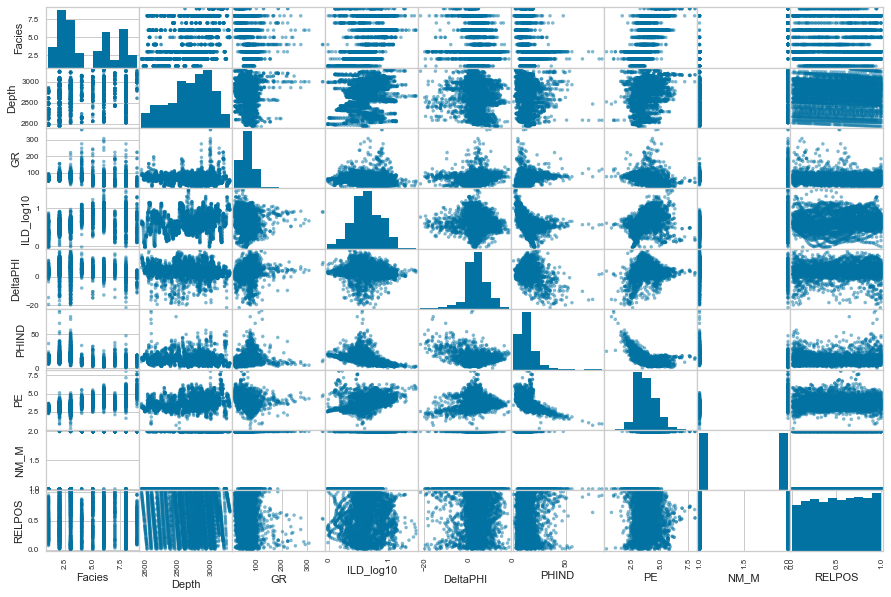

In [22]:
#visualizing a scatter matrix
pd.plotting.scatter_matrix(df,figsize=(15,10));

In [23]:
#Verifying the integer categorical and numerical columns
categorical

['Formation', 'Well Name', 'NM_M']

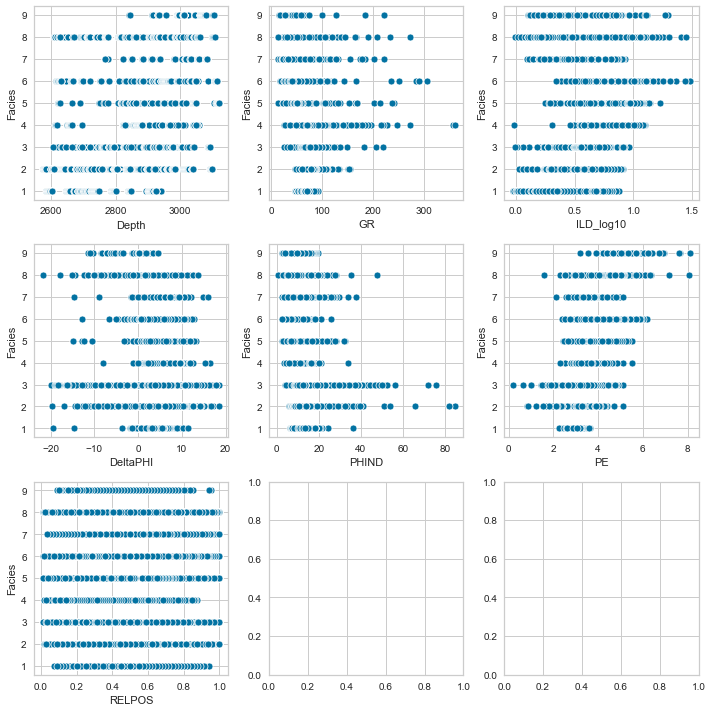

In [24]:
#testing for any basic relation of numerical columns with the target variable
fig,axes = plt.subplots(ncols = 3, nrows = 3, figsize =(10,10))
axes=axes.flatten()
for i,col in enumerate(numerical):
    try:
        sns.scatterplot(x=col, y='Facies', data=df, ax = axes[i],palette='mako')#, palette=color_palette);
    except:
        print(f'{col} - check')
plt.tight_layout()

### Class Imbalance

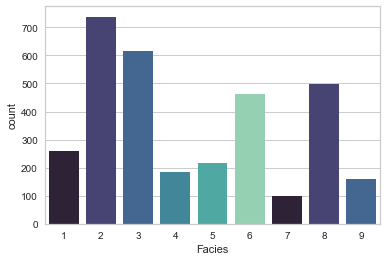

In [25]:
# Detecting class imbalance
color_palette = sns.color_palette("mako")
sns.countplot('Facies', data = df, palette=color_palette);
display((df.Facies.value_counts(normalize = True)*100).to_frame().style.background_gradient())

## Train Test Split

In [26]:
y = df.Facies
X = df.copy().drop('Facies', axis = 1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

### Class Imbalance

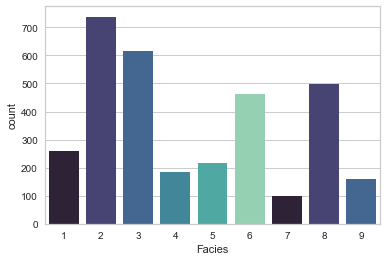

In [28]:
#on original Data
color_palette = sns.color_palette("mako")
sns.countplot(y, palette=color_palette);
display((y.value_counts(normalize = True)*100).to_frame().style.background_gradient())

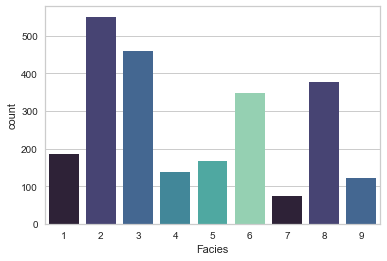

In [29]:
#on training data
color_palette = sns.color_palette("mako")
sns.countplot(y_train, palette=color_palette);
display((y_train.value_counts(normalize = True)*100).to_frame().style.background_gradient())

### Train-Test using Stratify

In [30]:
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(X, y, random_state = 7,stratify = y)

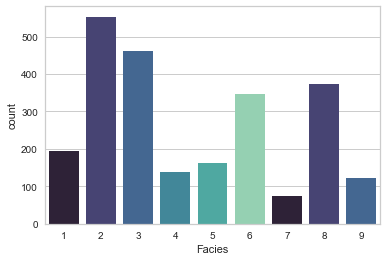

In [31]:
color_palette = sns.color_palette("mako")
sns.countplot(y_train_str, palette=color_palette);
display((y_train_str.value_counts(normalize = True)*100).to_frame().style.background_gradient())

## Preprocessing

### Filling The Null Values

Although there aren't any null values in this dataset, there are chances of having some while this model is used at the users end. It is therefore paramount to consider and accommodate for the possible null values.

In [32]:
df.head()

Facies Formation  Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       3     A1 SH  SHRIMPLIN  2793.0  77.45      0.664       9.9  11.915   
1       3     A1 SH  SHRIMPLIN  2793.5  78.26      0.661      14.2  12.565   
2       3     A1 SH  SHRIMPLIN  2794.0  79.05      0.658      14.8  13.050   
3       3     A1 SH  SHRIMPLIN  2794.5  86.10      0.655      13.9  13.115   
4       3     A1 SH  SHRIMPLIN  2795.0  74.58      0.647      13.5  13.300   

    PE  NM_M  RELPOS  
0  4.6     1   1.000  
1  4.1     1   0.979  
2  3.6     1   0.957  
3  3.5     1   0.936  
4  3.4     1   0.915

In [33]:
num_imputer = KNNImputer(weights='distance') #parameter: copy = True/False?
cat_imputer = KNNImputer(weights='distance')

### Scaling Numerical Columns

Exploring the numerical data to select the best scaler, and then applying the appropriate scaling method.

In [34]:
df[numerical]

Depth      GR  ILD_log10  DeltaPHI   PHIND     PE  RELPOS
0     2793.0  77.450      0.664     9.900  11.915  4.600   1.000
1     2793.5  78.260      0.661    14.200  12.565  4.100   0.979
2     2794.0  79.050      0.658    14.800  13.050  3.600   0.957
3     2794.5  86.100      0.655    13.900  13.115  3.500   0.936
4     2795.0  74.580      0.647    13.500  13.300  3.400   0.915
...      ...     ...        ...       ...     ...    ...     ...
3227  3120.5  46.719      0.947     1.828   7.254  3.617   0.685
3228  3121.0  44.563      0.953     2.241   8.013  3.344   0.677
3229  3121.5  49.719      0.964     2.925   8.013  3.190   0.669
3230  3122.0  51.469      0.965     3.083   7.708  3.152   0.661
3231  3122.5  50.031      0.970     2.609   6.668  3.295   0.653

[3231 rows x 7 columns]

**Visualizations to select scaling method:**

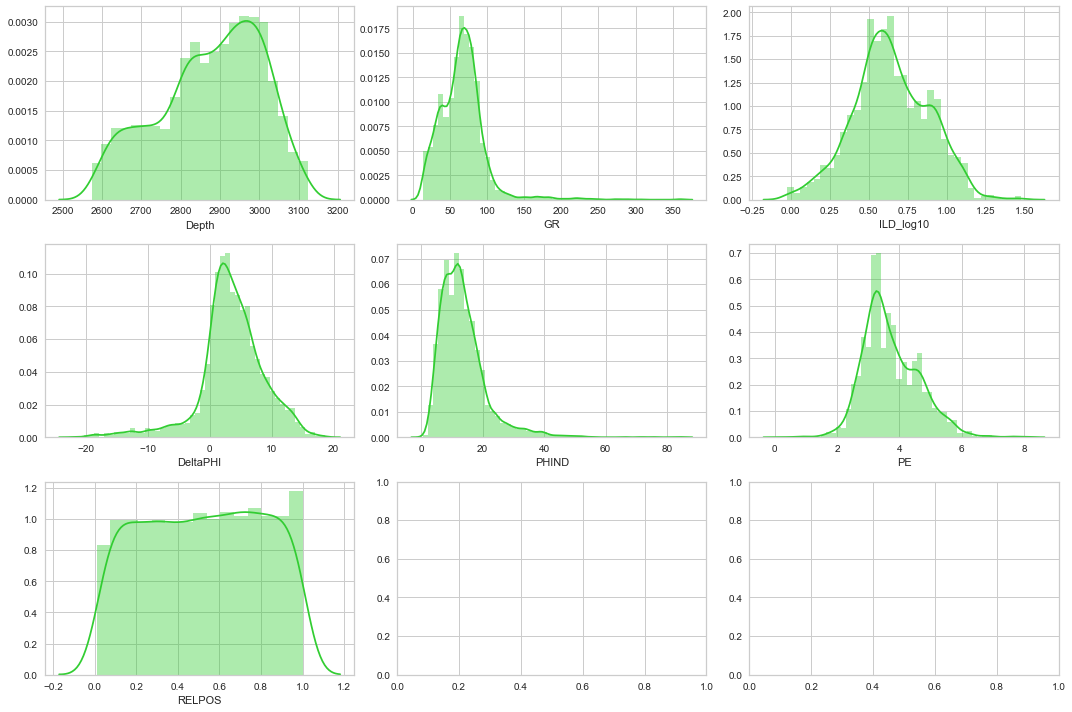

In [35]:
fig,axes = plt.subplots(ncols = 3, nrows = 3, figsize =(15,10))
axes=axes.flatten()
for i,col in enumerate(numerical):
    try:
        sns.distplot(df[col], ax = axes[i], color = '#32CD32');
    except:
        print(f'{col} - check')
plt.tight_layout()

Robust scaler will work for all, .........RELPOS???, quantile transformer/power?

In [36]:
from sklearn.preprocessing import QuantileTransformer

### One Hot Encoding the Categorical Columns

In [37]:
encoder = OneHotEncoder(sparse=False, drop = 'first')

In [38]:
#Test
X_train_ohe_trial = encoder.fit_transform(X_train[categorical])
display(encoder.get_feature_names(categorical))
pd.DataFrame(X_train_ohe_trial, columns=encoder.get_feature_names(categorical))

array(['Formation_A1 SH', 'Formation_B1 LM', 'Formation_B1 SH',
       'Formation_B2 LM', 'Formation_B2 SH', 'Formation_B3 LM',
       'Formation_B3 SH', 'Formation_B4 LM', 'Formation_B4 SH',
       'Formation_B5 LM', 'Formation_B5 SH', 'Formation_C LM',
       'Formation_C SH', 'Well Name_CROSS H CATTLE', 'Well Name_LUKE G U',
       'Well Name_NEWBY', 'Well Name_NOLAN', 'Well Name_Recruit F9',
       'Well Name_SHANKLE', 'Well Name_SHRIMPLIN', 'NM_M_2'], dtype=object)

Formation_A1 SH  Formation_B1 LM  Formation_B1 SH  Formation_B2 LM  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 0.0              0.0              1.0              0.0   
3                 1.0              0.0              0.0              0.0   
4                 0.0              1.0              0.0              0.0   
...               ...              ...              ...              ...   
2418              0.0              0.0              0.0              0.0   
2419              0.0              1.0              0.0              0.0   
2420              0.0              0.0              0.0              0.0   
2421              0.0              0.0              0.0              0.0   
2422              0.0              0.0              0.0              0.0   

      Formation_B2 SH  Formation_B3 LM  Formation_B3 SH  Formation_B4 LM  \
0                 0.0              0.0              0.0              0.0   
1                 1.0              0.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
3                 0.0              0.0              0.0              0.0   
4                 0.0              0.0              0.0              0.0   
...               ...              ...              ...              ...   
2418              1.0              0.0              0.0              0.0   
2419              0.0              0.0              0.0              0.0   
2420              0.0              0.0              0.0              0.0   
2421              0.0              0.0              0.0              0.0   
2422              1.0              0.0              0.0              0.0   

      Formation_B4 SH  Formation_B5 LM  ...  Formation_C LM  Formation_C SH  \
0                 0.0              0.0  ...             0.0             0.0   
1                 0.0              0.0  ...             0.0             0.0   
2                 0.0              0.0  ...             0.0             0.0   
3                 0.0              0.0  ...             0.0             0.0   
4                 0.0              0.0  ...             0.0             0.0   
...               ...              ...  ...             ...             ...   
2418              0.0              0.0  ...             0.0             0.0   
2419              0.0              0.0  ...             0.0             0.0   
2420              0.0              0.0  ...             0.0             0.0   
2421              0.0              0.0  ...             0.0             0.0   
2422              0.0              0.0  ...             0.0             0.0   

      Well Name_CROSS H CATTLE  Well Name_LUKE G U  Well Name_NEWBY  \
0                          0.0                 0.0              0.0   
1                          0.0                 1.0              0.0   
2                          1.0                 0.0              0.0   
3                          0.0                 0.0              0.0   
4                          0.0                 0.0              0.0   
...                        ...                 ...              ...   
2418                       1.0                 0.0              0.0   
2419                       0.0                 0.0              1.0   
2420                       0.0                 0.0              0.0   
2421                       0.0                 1.0              0.0   
2422                       0.0                 0.0              0.0   

      Well Name_NOLAN  Well Name_Recruit F9  Well Name_SHANKLE  \
0                 0.0                   0.0                0.0   
1                 0.0                   0.0                0.0   
2                 0.0                   0.0                0.0   
3                 0.0                   0.0                0.0   
4                 0.0                   0.0     

### Pipelines

In [39]:
set_config(display='diagram')

#### Preprocessing

In [40]:
cat_transformer = Pipeline(steps=[('impute', KNNImputer(weights='distance')),
                                  ('ohe', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'))])

In [41]:
num_transformer = Pipeline(steps=[('impute', KNNImputer(weights='distance')),
                                  ('scaler', RobustScaler())])

In [42]:
preprocessing = ColumnTransformer(transformers=[('num', num_transformer,numerical),
                                                ('cat', cat_transformer,categorical)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  KNNImputer(weights='distance')),
                                                 ('scaler', RobustScaler())]),
                                 ['Depth', 'GR', 'ILD_log10', 'DeltaPHI',
                                  'PHIND', 'PE', 'RELPOS']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  KNNImputer(weights='distance')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Formation', 'Well Name', 'NM_M'])])

In [43]:
def preprocessing(num_cols, cat_cols,
                  cat_imputer=KNNImputer(weights='distance'), 
                  encoder=OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'), 
                  num_imputer=KNNImputer(weights='distance'), 
                  transformation=PowerTransformer()):
    
    '''Builds a preprocessing pipeline and column transformation to data containing numerical and/or categorical data 
    based on the chosen classes/preprocessing methods
    --------------------------------
    Inputs:
    
    cat_imputer (class): Imputer class for categorical data. Default - KNNImputer() with weights as distance
    encoder (class): encoding class for categorical data. Default - OneHotEncoder() ignoring the unknowns and dropping first
    num_imputer (class): Imputer class for numerical data. Default - KNNImputer() with weights as distance
    transformation (class): linear scaling or non-linear transformation class. Default - PowerTransformer()
    num_cols (list): numerical columns
    cat_cols (list): categorical columns
    --------------------------------
    Output:
    
    ColumnTransformer pipeline to preprocess a given data
    --------------------------------'''
    
    cat_transformer = Pipeline(steps=[('impute', cat_imputer),
                                  ('ohe', encoder)])
    
    num_transformer = Pipeline(steps=[('impute', num_imputer),
                                  ('scaler', transformation)])
    
    preprocessing = ColumnTransformer(transformers=[('num', num_transformer,num_cols),
                                                ('cat', cat_transformer,cat_cols)])
    return preprocessing

In [44]:
preprocessing(numerical, categorical, transformation=RobustScaler())

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  KNNImputer(weights='distance')),
                                                 ('scaler', RobustScaler())]),
                                 ['Depth', 'GR', 'ILD_log10', 'DeltaPHI',
                                  'PHIND', 'PE', 'RELPOS']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  KNNImputer(weights='distance')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Formation', 'Well Name', 'NM_M'])])

In [45]:
def preprocessing_trial(num_cols, cat_cols,
                  cat_imputer=KNNImputer(weights='distance'), 
                  encoder=OneHotEncoder(sparse=False, drop='first',handle_unknown='error'), 
                  num_imputer=KNNImputer(weights='distance'), 
                  transformation=PowerTransformer()):
    
    '''Builds a preprocessing pipeline and column transformation to data containing numerical and/or categorical data 
    based on the chosen classes/preprocessing methods
    --------------------------------
    Inputs:
    
    cat_imputer (class): Imputer class for categorical data. Default - KNNImputer() with weights as distance
    encoder (class): encoding class for categorical data. Default - OneHotEncoder() ignoring the unknowns and dropping first
    num_imputer (class): Imputer class for numerical data. Default - KNNImputer() with weights as distance
    transformation (class): linear scaling or non-linear transformation class. Default - PowerTransformer()
    num_cols (list): numerical columns
    cat_cols (list): categorical columns
    --------------------------------
    Output:
    
    ColumnTransformer pipeline to preprocess a given data
    --------------------------------'''
    
    cat_transformer = Pipeline(steps=[('ohe', encoder),
                                      ('impute', cat_imputer)])
    
    num_transformer = Pipeline(steps=[('impute', num_imputer),
                                  ('scaler', transformation)])
    
    preprocessing = ColumnTransformer(transformers=[('num', num_transformer,num_cols),
                                                ('cat', cat_transformer,cat_cols)])
    return preprocessing

#### Modeling

In [46]:
def model_pipeline(model,preprocessor):
    model = Pipeline(steps = [('preprocessor', preprocessor),
                              ('model', model)])
    return model

In [47]:
model_pipeline(KNeighborsRegressor(),preprocessing(numerical, categorical, transformation=RobustScaler()))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(weights='distance')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Depth', 'GR', 'ILD_log10',
                                                   'DeltaPHI', 'PHIND', 'PE',
                                                   'RELPOS']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(weights='distance')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Formation', 'Well Name',
                                                   'NM_M'])])),
                ('model', KNeighborsRegressor())])

## Train Validation Split

In [48]:
X_train_model, X_validation, y_train_model, y_validation = train_test_split(X_train, y_train, random_state = 7)

## Base Model - KNN

Since the nature of the dataset is such that most of the immediate data points in depth have the same characteristics, except on the boundaries, our best first approach could be using the KNN model.

In [49]:
# # Initiate model
# knn_model = model_pipeline(KNeighborsClassifier(weights='distance'),
#                            preprocessing(numerical,categorical, transformation=RobustScaler()))

# #Fit model
# knn_model.fit(X_train_model,y_train_model)

In [50]:
# model_pipeline(KNeighborsClassifier(weights='distance'),
#                            preprocessing(numerical,categorical, transformation=RobustScaler()))

In [51]:
# Initiate model
knn_model_trial = model_pipeline(KNeighborsClassifier(weights='distance'),
                           preprocessing_trial(numerical,categorical, transformation=RobustScaler()))

#Fit model
knn_model_trial.fit(X_train_model,y_train_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(weights='distance')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Depth', 'GR', 'ILD_log10',
                                                   'DeltaPHI', 'PHIND', 'PE',
                                                   'RELPOS']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('impute',
                                                                   KNNImputer(weights='distance'))]),
                                                  ['Formation', 'Well Name',
                                                   'NM_M'])])),
                ('model', KNeighborsClassifier(weights='distance'))])

In [52]:
#Predict
y_hat_knn_trial = knn_model_trial.predict(X_validation)

In [53]:
print(metrics.classification_report(y_validation, y_hat_knn_trial))
#output_dict = True

              precision    recall  f1-score   support

           1       0.84      0.88      0.86        42
           2       0.85      0.83      0.84       150
           3       0.75      0.77      0.76       115
           4       0.63      0.76      0.69        34
           5       0.77      0.75      0.76        36
           6       0.75      0.75      0.75        79
           7       0.79      0.73      0.76        15
           8       0.85      0.78      0.81       105
           9       0.94      0.97      0.95        30

    accuracy                           0.80       606
   macro avg       0.80      0.80      0.80       606
weighted avg       0.80      0.80      0.80       606



In [54]:
#Evaluation Report

In [55]:
class formating:
    underline = '\033[4m'
    bold = '\033[1m'
    italics = '\033[3m'
    cyan = '\033[36m'
    blue = '\033[34m'
    green = '\033[32m'
    normal = '\033[0m'

In [56]:
def model_evaluation(model,X,y,cm_normalize = 'true', cm_cmap = 'BuGn_r' ):
    '''Displays classification matrix and visual evaluation (confusion matrix) for a given scikit learn model
    for test data
    ------------------------------
    Inputs:
    
    model (sklearn model)
    X (DataFrame, series or array): test data for features
    y (series or array): dependent variable
    ------------------------------
    
    Outputs:
    
    sklearn confusion matrix (DataFrame)
    sklearn confusion matrix plot
    ------------------------------'''
    
    print('\n')
    print(formating.bold + formating.underline+ formating.blue + 'MODEL EVALUATION' + formating.normal)
    print('\n')
    
    #classification report
    
    print(formating.bold + formating.underline + 'Classification Report' + formating.normal)
#     print('\n')
    
    y_hat = model.predict(X)
    display(pd.DataFrame(metrics.classification_report(y,y_hat,output_dict=True)))
    
    
    #Visual Separation
    
    print('\n')
    print('--'*20)
    print('\n')
    
    
    #Visual Evaluation
    
    print(formating.bold + formating.underline + 'Visual Evaluation' + formating.normal)
#     print('\n')
    
    fig,axes = plt.subplots(figsize = (7,7))
#     axes = axes.flatten()
    
    metrics.plot_confusion_matrix(model,X,y,normalize = cm_normalize, cmap = cm_cmap,ax=axes)#, ax=axes[0])
    axes.set_title('Confusion Matrix')
    
#     metrics.plot_roc_curve(model, X,y, ax=axes[1])
#     axes[1].set_title('ROC Curve')
#     axes[1].legend()
#     axes[1].plot([0,1],[0,1], ls = ':')
    
    fig.tight_layout()
#     plt.show()



MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.840909    0.849315    0.747899   0.634146   0.771429   0.746835   
recall      0.880952    0.826667    0.773913   0.764706   0.750000   0.746835   
f1-score    0.860465    0.837838    0.760684   0.693333   0.760563   0.746835   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.785714    0.845361   0.935484   0.79868    0.795233   
recall      0.733333    0.780952   0.966667   0.79868    0.802670   
f1-score    0.758621    0.811881   0.950820   0.79868    0.797893   
support    15.000000  105.000000  30.000000   0.79868  606.000000   

           weighted avg  
precision      0.801435  
recall         0.798680  
f1-score       0.799338  
support      606.000000



----------------------------------------


Visual Evaluation


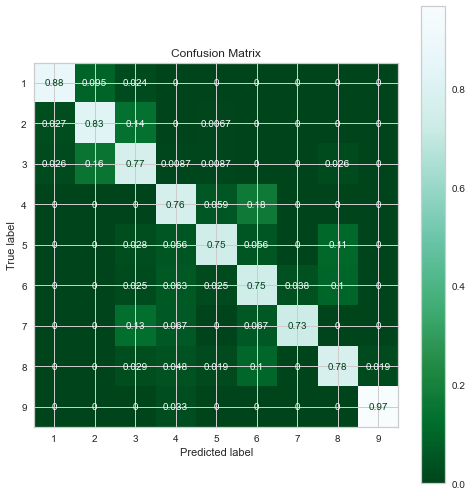

In [57]:
knn_model = knn_model_trial.fit(X_train_model,y_train_model)
model_evaluation(knn_model,X_validation,y_validation,cm_cmap = 'BuGn_r')

### GridSearchCV

In [58]:
parameter = {'model__n_neighbors': [5,10,15,20],
             'model__weights': ['uniform','distance']}
cv = GridSearchCV(knn_model,param_grid = parameter, scoring = 'f1_macro')
cv.fit(X_train_model,y_train_model)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer(weights='distance')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Depth',
                                                                          'GR',
                                                                          'ILD_log10',
                                                                          'DeltaPHI',
                                                                          'PHIND',
                                                                          'PE',
                                                                          'RELPOS']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('impute',
                                                                                          KNNImputer(weights='distance'))]),
                                                                         ['Formation',
                                                                          'Well '
                                                                          'Name',
                                                                          'NM_M'])])),
                                       ('model',
                                        KNeighborsClassifier(weights='distance'))]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20],
                         'model__weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [59]:
cv.best_params_

{'model__n_neighbors': 5, 'model__weights': 'distance'}

In [60]:
parameter = {'model__n_neighbors': [2,3,4,5],
             'model__weights': ['uniform','distance']}
cv = GridSearchCV(knn_model,param_grid = parameter,scoring = 'f1_macro')
cv.fit(X_train_model,y_train_model)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer(weights='distance')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Depth',
                                                                          'GR',
                                                                          'ILD_log10',
                                                                          'DeltaPHI',
                                                                          'PHIND',
                                                                          'PE',
                                                                          'RELPOS']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('impute',
                                                                                          KNNImputer(weights='distance'))]),
                                                                         ['Formation',
                                                                          'Well '
                                                                          'Name',
                                                                          'NM_M'])])),
                                       ('model',
                                        KNeighborsClassifier(weights='distance'))]),
             param_grid={'model__n_neighbors': [2, 3, 4, 5],
                         'model__weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [61]:
cv.best_params_

{'model__n_neighbors': 2, 'model__weights': 'distance'}



MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.875000    0.863946    0.798319   0.625000   0.763158   0.766234   
recall      0.833333    0.846667    0.826087   0.735294   0.805556   0.746835   
f1-score    0.853659    0.855219    0.811966   0.675676   0.783784   0.756410   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.857143    0.831683   0.966667  0.816832    0.816350   
recall      0.800000    0.800000   0.966667  0.816832    0.817827   
f1-score    0.827586    0.815534   0.966667  0.816832    0.816278   
support    15.000000  105.000000  30.000000  0.816832  606.000000   

           weighted avg  
precision      0.819453  
recall         0.816832  
f1-score       0.817662  
support      606.000000



----------------------------------------


Visual Evaluation


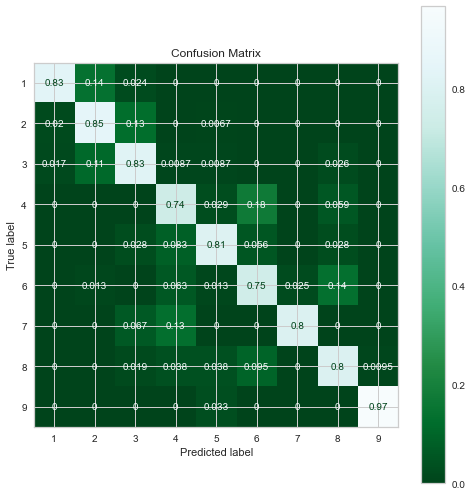

In [62]:
model_evaluation(cv.best_estimator_,X_validation,y_validation,cm_cmap = 'BuGn_r')

### Effect of Transformers

#### QuantileTransformer

In [63]:
model2_pipeline = model_pipeline(KNeighborsClassifier(weights='distance'),
                           preprocessing_trial(numerical,categorical, transformation=QuantileTransformer(random_state = 7)))
model_2 = model2_pipeline.fit(X_train_model,y_train_model)
parameter = {'model__n_neighbors': [5,10,15,20],
             'model__weights': ['uniform','distance'],
            'preprocessor__num__impute__weights' : ['uniform','distance']}
cv2 = GridSearchCV(model_2,param_grid = parameter, scoring = 'f1_macro')
cv2.fit(X_train_model,y_train_model)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer(weights='distance')),
                                                                                         ('scaler',
                                                                                          QuantileTransformer(random_state=7))]),
                                                                         ['Depth',
                                                                          'GR',
                                                                          'ILD_log10',
                                                                          'DeltaPHI',
                                                                          'PHIND',
                                                                          'PE',
                                                                          'RELPOS']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('impute',
                                                                                          KNNImputer(weights='distance'))]),
                                                                         ['Formation',
                                                                          'Well '
                                                                          'Name',
                                                                          'NM_M'])])),
                                       ('model',
                                        KNeighborsClassifier(weights='distance'))]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20],
                         'model__weights': ['uniform', 'distance'],
                         'preprocessor__num__impute__weights': ['uniform',
                                                                'distance']},
             scoring='f1_macro')

In [64]:
cv2.best_params_

{'model__n_neighbors': 5,
 'model__weights': 'distance',
 'preprocessor__num__impute__weights': 'uniform'}

In [65]:
model2_pipeline = model_pipeline(KNeighborsClassifier(weights='distance'),
                           preprocessing_trial(numerical,categorical, transformation=QuantileTransformer(random_state = 7)))
model_2 = model2_pipeline.fit(X_train_model,y_train_model)
parameter = {'model__n_neighbors': [2,3,4,5],
             'model__weights': ['uniform','distance'],
            'preprocessor__num__impute__weights' : ['uniform','distance']}
cv2 = GridSearchCV(model_2,param_grid = parameter,scoring = 'f1_macro')
cv2.fit(X_train_model,y_train_model)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer(weights='distance')),
                                                                                         ('scaler',
                                                                                          QuantileTransformer(random_state=7))]),
                                                                         ['Depth',
                                                                          'GR',
                                                                          'ILD_log10',
                                                                          'DeltaPHI',
                                                                          'PHIND',
                                                                          'PE',
                                                                          'RELPOS']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('impute',
                                                                                          KNNImputer(weights='distance'))]),
                                                                         ['Formation',
                                                                          'Well '
                                                                          'Name',
                                                                          'NM_M'])])),
                                       ('model',
                                        KNeighborsClassifier(weights='distance'))]),
             param_grid={'model__n_neighbors': [2, 3, 4, 5],
                         'model__weights': ['uniform', 'distance'],
                         'preprocessor__num__impute__weights': ['uniform',
                                                                'distance']},
             scoring='f1_macro')

In [66]:
cv2.best_params_

{'model__n_neighbors': 2,
 'model__weights': 'distance',
 'preprocessor__num__impute__weights': 'uniform'}



MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.875000    0.863946    0.798319   0.625000   0.763158   0.766234   
recall      0.833333    0.846667    0.826087   0.735294   0.805556   0.746835   
f1-score    0.853659    0.855219    0.811966   0.675676   0.783784   0.756410   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.857143    0.831683   0.966667  0.816832    0.816350   
recall      0.800000    0.800000   0.966667  0.816832    0.817827   
f1-score    0.827586    0.815534   0.966667  0.816832    0.816278   
support    15.000000  105.000000  30.000000  0.816832  606.000000   

           weighted avg  
precision      0.819453  
recall         0.816832  
f1-score       0.817662  
support      606.000000



----------------------------------------


Visual Evaluation


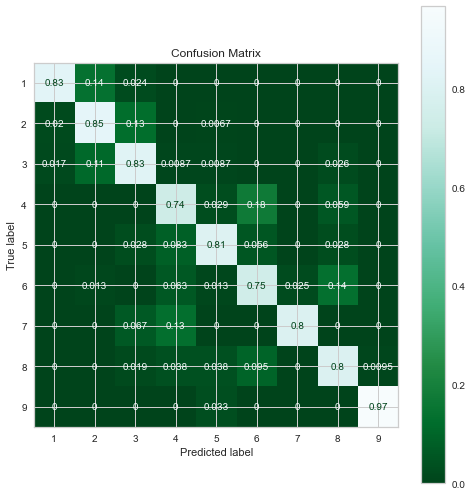

In [67]:
model_evaluation(cv.best_estimator_,X_validation,y_validation,cm_cmap = 'BuGn_r')

#### PowerTransformer

In [68]:
model3_pipeline = model_pipeline(KNeighborsClassifier(weights='distance'),
                           preprocessing_trial(numerical,categorical, transformation=PowerTransformer()))
model_3 = model3_pipeline.fit(X_train_model,y_train_model)
parameter = {'model__n_neighbors': [2,3,4,5],
             'model__weights': ['uniform','distance'],
            'preprocessor__num__impute__weights' : ['uniform','distance']}
cv3 = GridSearchCV(model_3,param_grid = parameter, scoring = 'f1_macro')
cv3.fit(X_train_model,y_train_model)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer(weights='distance')),
                                                                                         ('scaler',
                                                                                          PowerTransformer())]),
                                                                         ['Depth',
                                                                          'GR',
                                                                          'ILD_log10',
                                                                          'DeltaPHI',
                                                                          'PHIND',
                                                                          'PE',
                                                                          'RELPOS']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('impute',
                                                                                          KNNImputer(weights='distance'))]),
                                                                         ['Formation',
                                                                          'Well '
                                                                          'Name',
                                                                          'NM_M'])])),
                                       ('model',
                                        KNeighborsClassifier(weights='distance'))]),
             param_grid={'model__n_neighbors': [2, 3, 4, 5],
                         'model__weights': ['uniform', 'distance'],
                         'preprocessor__num__impute__weights': ['uniform',
                                                                'distance']},
             scoring='f1_macro')

In [69]:
cv3.best_params_

{'model__n_neighbors': 2,
 'model__weights': 'distance',
 'preprocessor__num__impute__weights': 'uniform'}



MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.875000    0.851351    0.796610   0.615385   0.743590   0.775000   
recall      0.833333    0.840000    0.817391   0.705882   0.805556   0.784810   
f1-score    0.853659    0.845638    0.806867   0.657534   0.773333   0.779874   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.857143    0.857143   0.966667  0.816832    0.815321   
recall      0.800000    0.800000   0.966667  0.816832    0.817071   
f1-score    0.827586    0.827586   0.966667  0.816832    0.815416   
support    15.000000  105.000000  30.000000  0.816832  606.000000   

           weighted avg  
precision      0.819864  
recall         0.816832  
f1-score       0.817831  
support      606.000000



----------------------------------------


Visual Evaluation


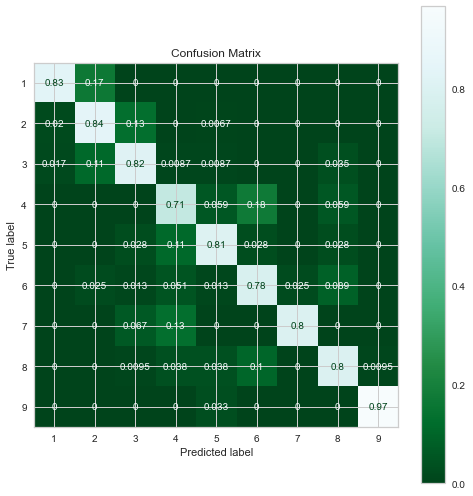

In [70]:
model_evaluation(cv3.best_estimator_, X_validation, y_validation)

### Visualization and Best Estimator Selection

#### Best Estimator

In [71]:
y_hat_trial = cv.best_estimator_.predict(X_validation)
report = pd.DataFrame(metrics.classification_report(y_validation,y_hat_trial, output_dict=True))
report.loc['f1-score']

1               0.853659
2               0.855219
3               0.811966
4               0.675676
5               0.783784
6               0.756410
7               0.827586
8               0.815534
9               0.966667
accuracy        0.816832
macro avg       0.816278
weighted avg    0.817662
Name: f1-score, dtype: float64

In [72]:
models = [cv,cv2,cv3]
description = ['RobustScaler','QuantileTransformer','PowerTransformer']
scores = {}
for i in range(len(models)):
    y_hat_trial = models[i].best_estimator_.predict(X_validation)
    report = pd.DataFrame(metrics.classification_report(y_validation,y_hat_trial, output_dict=True))
    scores[description[i]] = report.loc['f1-score']
scores

{'RobustScaler': 1               0.853659
 2               0.855219
 3               0.811966
 4               0.675676
 5               0.783784
 6               0.756410
 7               0.827586
 8               0.815534
 9               0.966667
 accuracy        0.816832
 macro avg       0.816278
 weighted avg    0.817662
 Name: f1-score, dtype: float64,
 'QuantileTransformer': 1               0.867470
 2               0.865772
 3               0.843478
 4               0.695652
 5               0.743590
 6               0.738854
 7               0.800000
 8               0.836538
 9               0.949153
 accuracy        0.825083
 macro avg       0.815612
 weighted avg    0.825745
 Name: f1-score, dtype: float64,
 'PowerTransformer': 1               0.853659
 2               0.845638
 3               0.806867
 4               0.657534
 5               0.773333
 6               0.779874
 7               0.827586
 8               0.827586
 9               0.966667
 accuracy        

In [73]:
f1_table = pd.DataFrame(scores).reset_index()
f1_table = f1_table.rename(columns = {'index':'Formation'})
f1_table_formation = f1_table.loc[:8]
f1_table_formation

Formation  RobustScaler  QuantileTransformer  PowerTransformer
0         1      0.853659             0.867470          0.853659
1         2      0.855219             0.865772          0.845638
2         3      0.811966             0.843478          0.806867
3         4      0.675676             0.695652          0.657534
4         5      0.783784             0.743590          0.773333
5         6      0.756410             0.738854          0.779874
6         7      0.827586             0.800000          0.827586
7         8      0.815534             0.836538          0.827586
8         9      0.966667             0.949153          0.966667

In [74]:
table = pd.melt(f1_table_formation, id_vars=['Formation'],value_name='f1_score', var_name = 'Scaler/Transformer')

<AxesSubplot:xlabel='Formation', ylabel='f1_score'>

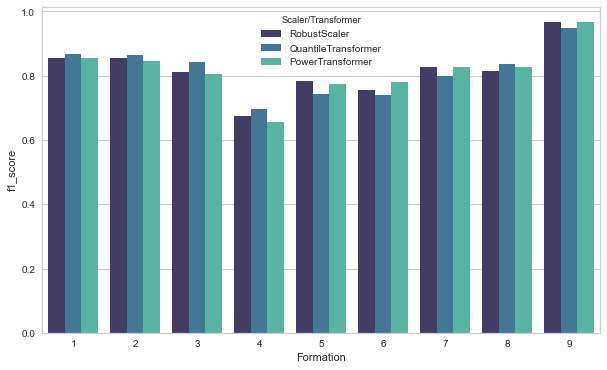

In [75]:
fig,axes = plt.subplots(figsize = (10,6))
sns.barplot('Formation', 'f1_score', hue = 'Scaler/Transformer', data = table, palette='mako', ax=axes)

In [76]:
f1_table_formation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
Formation              9 non-null object
RobustScaler           9 non-null float64
QuantileTransformer    9 non-null float64
PowerTransformer       9 non-null float64
dtypes: float64(3), object(1)
memory usage: 416.0+ bytes


In [77]:
f1_table_formation['Formation']=f1_table_formation['Formation'].astype('float64')
f1_table_formation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
Formation              9 non-null float64
RobustScaler           9 non-null float64
QuantileTransformer    9 non-null float64
PowerTransformer       9 non-null float64
dtypes: float64(4)
memory usage: 416.0 bytes


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
f1_table_formation.columns[1:][1]

'QuantileTransformer'

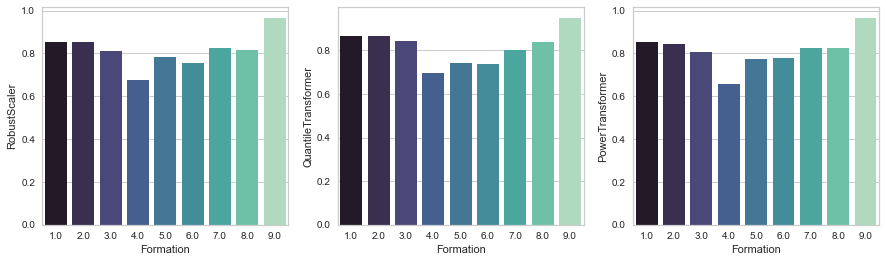

In [79]:
fig,axes = plt.subplots(ncols=3, figsize = (15,4))
columns = f1_table_formation.columns[1:]
for i in range(len(columns)):
    sns.barplot(y=columns[i],x='Formation', data=f1_table_formation, ax = axes[i], palette='mako')

In [80]:
metrics.f1_score(y_validation,y_hat_trial,average='macro')

0.815415994163623

In [81]:
models = [cv,cv2,cv3]
description = ['RobustScaler','QuantileTransformer','PowerTransformer']
f1_macro = []
for i in range(len(models)):
    y_hat_trial = models[i].best_estimator_.predict(X_validation)
    f1 = round(metrics.f1_score(y_validation,y_hat_trial,average='macro'),5)
    f1_macro.append(f1)
f1_macro

[0.81628, 0.81561, 0.81542]

##### Therefore the KNN estimator is `cv`: Final Model - `final_KNN` 

In [82]:
cv.best_params_

{'model__n_neighbors': 2, 'model__weights': 'distance'}

In [83]:
final_KNN = cv.best_estimator_

#### Model Evaluation

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


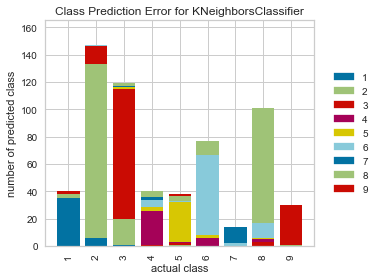

In [84]:
#Class Prediction Error 1
visualizer = ClassPredictionError(final_KNN)
visualizer.fit(X_train_model,y_train_model)
visualizer.score(X_validation,y_validation)
visualizer.show();

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


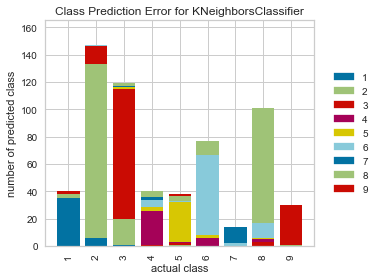

In [85]:
#Class Prediction Error 2
class_prediction_error(final_KNN,X_train_model, y_train_model, X_validation, y_validation);

In [86]:
# #Feature Importances
# X_train_feature = preprocessing_trial(numerical,categorical).fit_transform(X_train_model)
# visual = FeatureImportances(KNeighborsClassifier(cv.best_params_).fit(X_train_feature,y_train_model)) #relative importances
# visual.fit(X_train_feature,y_train_model)
# visual.show()

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


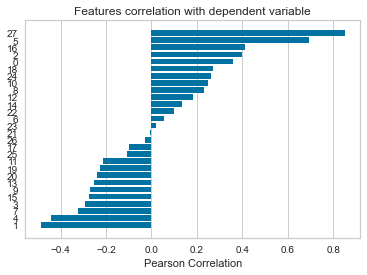

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [87]:
#Feature Correlation with target variable
visualize = FeatureCorrelation(sort = True)
X_train_feature = preprocessing_trial(numerical,categorical).fit_transform(X_train_model)
visualize.fit(X_train_feature,y_train_model)
visualize.show()

In [88]:
X_train_feature_j = preprocessing_trial(numerical,categorical).fit(X_train_model)
cat_cols_j = X_train_feature_j.named_transformers_['cat'].named_steps['ohe'].get_feature_names()
cols_j = numerical+list(cat_cols_j)
cols_j

['Depth',
 'GR',
 'ILD_log10',
 'DeltaPHI',
 'PHIND',
 'PE',
 'RELPOS',
 'x0_A1 SH',
 'x0_B1 LM',
 'x0_B1 SH',
 'x0_B2 LM',
 'x0_B2 SH',
 'x0_B3 LM',
 'x0_B3 SH',
 'x0_B4 LM',
 'x0_B4 SH',
 'x0_B5 LM',
 'x0_B5 SH',
 'x0_C LM',
 'x0_C SH',
 'x1_CROSS H CATTLE',
 'x1_LUKE G U',
 'x1_NEWBY',
 'x1_NOLAN',
 'x1_Recruit F9',
 'x1_SHANKLE',
 'x1_SHRIMPLIN',
 'x2_2']

In [89]:
X_train_feature_j_df = preprocessing_trial(numerical,categorical).fit_transform(X_train_model)
X_train_feature_j_df = pd.DataFrame(X_train_feature_j_df,columns = cols_j)
X_train_feature_j_df.columns

Index(['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'RELPOS',
       'x0_A1 SH', 'x0_B1 LM', 'x0_B1 SH', 'x0_B2 LM', 'x0_B2 SH', 'x0_B3 LM',
       'x0_B3 SH', 'x0_B4 LM', 'x0_B4 SH', 'x0_B5 LM', 'x0_B5 SH', 'x0_C LM',
       'x0_C SH', 'x1_CROSS H CATTLE', 'x1_LUKE G U', 'x1_NEWBY', 'x1_NOLAN',
       'x1_Recruit F9', 'x1_SHANKLE', 'x1_SHRIMPLIN', 'x2_2'],
      dtype='object')

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


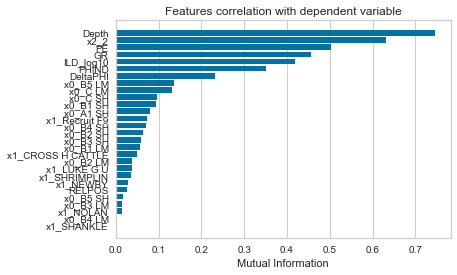

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [90]:
#Feature Correlation with target variable - mutual information
visualize = FeatureCorrelation(method='mutual_info-classification',sort = True,labels=cols_j)
X_train_feature = preprocessing_trial(numerical,categorical).fit_transform(X_train_model)
visualize.fit(X_train_feature,y_train_model)
visualize.show()

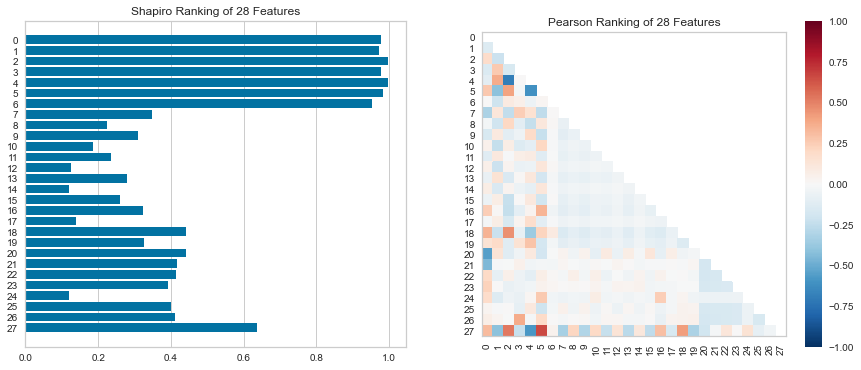

In [91]:
#Rank Features 1d and 2d
fig,axes = plt.subplots(ncols=2, figsize=(15,6))
rank1d(X_train_feature, ax=axes[0], show=False)
rank2d(X_train_feature, ax=axes[1], show=False)
plt.show()

In [92]:
# # Joint Plot Visualizer
# for column in X_train_feature_j_df.columns:
#     vis = joint_plot(X_train_feature[column], y_train_model)

In [93]:
final_KNN.named_steps['model']

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [94]:
eli5.explain_weights(final_KNN.named_steps['model'])

Explanation(estimator="KNeighborsClassifier(n_neighbors=2, weights='distance')", description=None, error="estimator KNeighborsClassifier(n_neighbors=2, weights='distance') is not supported", method=None, is_regression=False, targets=None, feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [95]:
# final_KNN.named_steps['model'].feature_importances_

In [96]:
# viz = FeatureImportances(final_KNN.named_steps['model'])
# viz.fit(X_train_feature_j_df,y_train_model)
# viz.show();

In [97]:
def model_visuals(model,X,y,X_test,y_test,num_cols,cat_cols,labels):
    
    #Class Prediction Error
    
    print('\n')
    print(formating.bold+formating.underline+formating.green+'CLASS PREDICTION ERROR'+formating.normal+'\n')
    class_prediction_error(model,X, y, X_test, y_test);
    
    print('\n')
    print('--'*50)
    print('\n')
    
    #Feature Correlation with target variable
    
    print(formating.bold+formating.underline+formating.green+'FEATURE CORRELATION WITH TARGET'+formating.normal+'\n')
    
    fig,axes = plt.subplots(ncols=2,figsize=(15,6))
    
    visualize = FeatureCorrelation(sort = True,ax = axes[0],labels = labels)
    X_train_feature = preprocessing_trial(numerical,categorical).fit_transform(X)
    visualize.fit(X_train_feature,y)
    visualize.show();
    
    visualize2 = FeatureCorrelation(method='mutual_info-classification',sort = True,ax = axes[1],labels = labels)
    X_train_feature = preprocessing_trial(num_cols,cat_cols).fit_transform(X)
    visualize2.fit(X_train_feature,y)
    visualize2.show();
    
    print('\n')
    print('--'*50)
    print('\n')
    
    #Rank Features 1d and 2d
    
    print(formating.bold+formating.underline+formating.green+'RANK FEATURES'+formating.normal+'\n')
    
    fig,axes = plt.subplots(ncols=2, figsize=(15,6))
    rank1d(X_train_feature, ax=axes[0], show=False, features = cols_j)
    rank2d(X_train_feature, ax=axes[1], show=False,features = cols_j)
    plt.show();

In [98]:
def feature_importances(model_classifier,preprocessed_X,y):
    
    print(formating.bold+formating.underline+formating.green+'FEATURE IMPORTANCES'+formating.normal+'\n')
    
    try:
        fig,ax=plt.subplots(figsize=(7,6))
        viz = FeatureImportances(model_classifier,ax=ax)
        viz.fit(preprocessed_X,y_train_model)
        viz.show();
        fig,ax1=plt.subplots(figsize=(7,6))
        viz2 = FeatureImportances(model_classifier,relative=False,ax=ax1)
        viz2.fit(preprocessed_X,y_train_model)
        viz2.show();
    except:
        print('Feature Importances is not compatable with this classifier')

In [99]:
def explained_weights(model_classifier,feature_names=cols_j,top=30):
    return eli5.explain_weights(model_classifier,feature_names = feature_names,top = top)



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


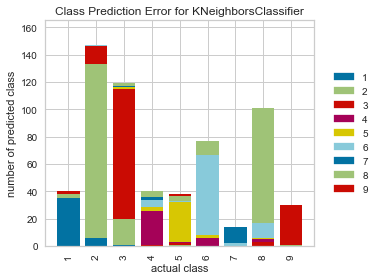



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


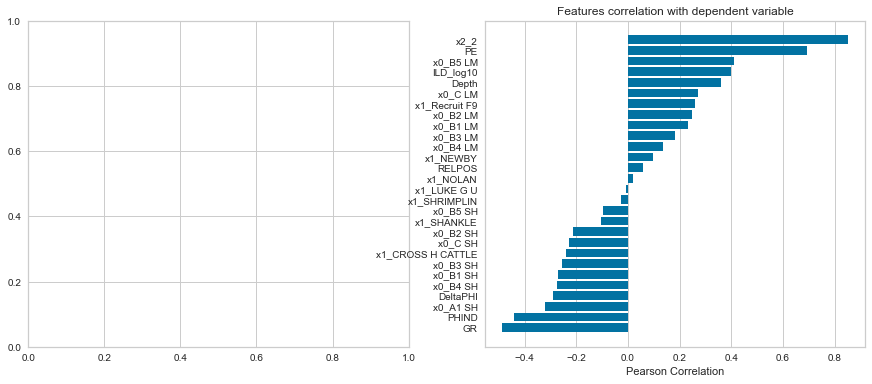

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


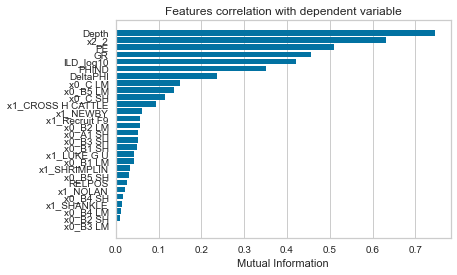



----------------------------------------------------------------------------------------------------


RANK FEATURES



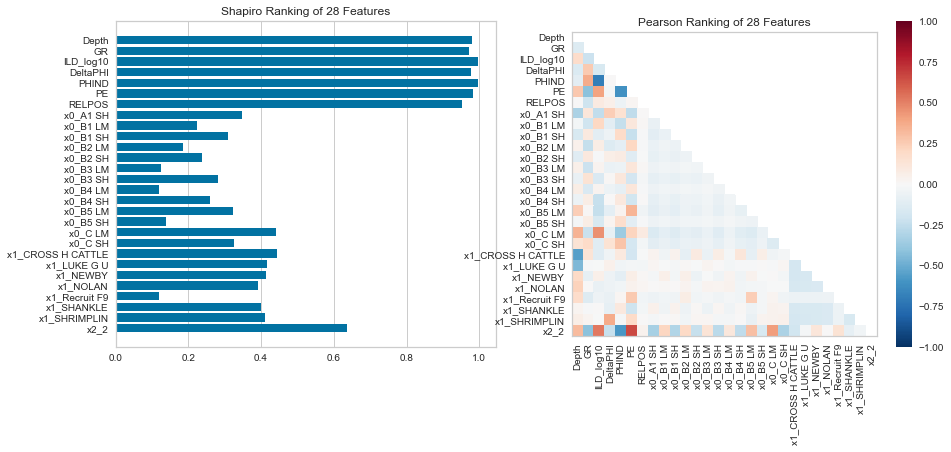

In [100]:
model_visuals(final_KNN,X_train_model,y_train_model,X_validation,y_validation,
              numerical,categorical,cols_j)

FEATURE IMPORTANCES

Feature Importances is not compatable with this classifier


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


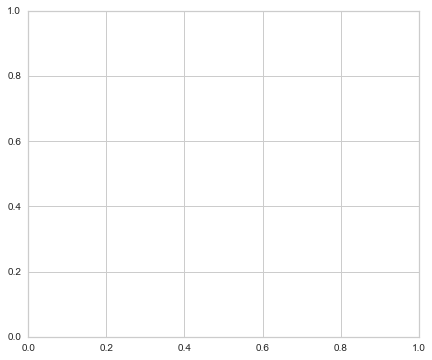

In [101]:
feature_importances(final_KNN.named_steps['model'],X_train_feature_j_df,y_train_model)

In [102]:
explained_weights(final_KNN.named_steps['model'])

Explanation(estimator="KNeighborsClassifier(n_neighbors=2, weights='distance')", description=None, error="estimator KNeighborsClassifier(n_neighbors=2, weights='distance') is not supported", method=None, is_regression=False, targets=None, feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## Decision Tree

In [103]:
preprocessor_DT = preprocessing_trial(numerical,categorical,transformation = RobustScaler())
DT_vanilla_pipeline = model_pipeline(DecisionTreeClassifier(), preprocessor_DT)
DT_vanilla = DT_vanilla_pipeline.fit(X_train_model, y_train_model)



MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.767442    0.789855    0.731092   0.512821   0.444444   0.649351   
recall      0.785714    0.726667    0.756522   0.588235   0.555556   0.632911   
f1-score    0.776471    0.756944    0.743590   0.547945   0.493827   0.641026   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.473684    0.702128   0.906250   0.69802    0.664119   
recall      0.600000    0.628571   0.966667   0.69802    0.693427   
f1-score    0.529412    0.663317   0.935484   0.69802    0.676446   
support    15.000000  105.000000  30.000000   0.69802  606.000000   

           weighted avg  
precision      0.705507  
recall         0.698020  
f1-score       0.700279  
support      606.000000



----------------------------------------


Visual Evaluation


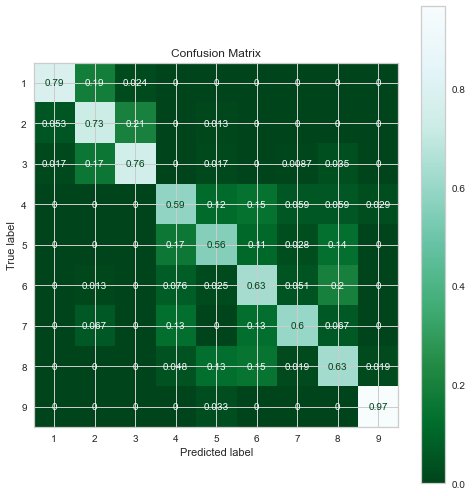

In [104]:
y_hat_DT_vanilla=DT_vanilla.predict(X_validation)
model_evaluation(DT_vanilla,X_validation,y_validation)

### GridSearchCV and Effect of Transformers

#### RobustScaler

In [105]:
def gridsearch_result(model,parameter,X_train,y_train,X_test,y_test,scoring='f1_macro'):
    
    '''Shows the best parameters for highest scoring and the results of the best estimatorthus built
    -------------------------------
    Input:
    
    model (sklearn model): model you want to find the best combination of parameters for
    parameter (dict): parameters to compute from
    scoring (str): score based on which the best estimator will be selected. Defaulted to f1_macro
    X_train (DataFram/Array): training features
    y_train (DataFram/Array): training predictor
    X_test (DataFram/Array): test data for features
    y_test (DataFram/Array): test data for predictor variable
    -------------------------------
    Output:
    
    best estimator parameters
    best estimator result analysis visuals (classification report, confusion matrix)
    '''
    
    cv = GridSearchCV(model,param_grid = parameter,scoring = scoring)
    cv.fit(X_train,y_train)
    
    #Best Parameters
    
    print('\n')
    print(formating.bold + formating.underline+ formating.blue + 'BEST ESTIMATOR PARAMETERS' + formating.normal)
    print(cv.best_params_)
    
    #Best estimator evaluation
    
    display(model_evaluation(cv.best_estimator_,X_test,y_test))
    
    return cv.best_params_ , cv.best_estimator_
    



BEST ESTIMATOR PARAMETERS
{'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__min_samples_leaf': 1}


MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.789474    0.779310    0.741667   0.647059   0.574468   0.654321   
recall      0.714286    0.753333    0.773913   0.647059   0.750000   0.670886   
f1-score    0.750000    0.766102    0.757447   0.647059   0.650602   0.662500   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.562500    0.802083   0.965517  0.739274    0.724044   
recall      0.600000    0.733333   0.933333  0.739274    0.730683   
f1-score    0.580645    0.766169   0.949153  0.739274    0.725520   
support    15.000000  105.000000  30.000000  0.739274  606.000000   

           weighted avg  
precision      0.744786  
recall         0.739274  
f1-score       0.740780  
support      606.000000



----------------------------------------


Visual Evaluation


None

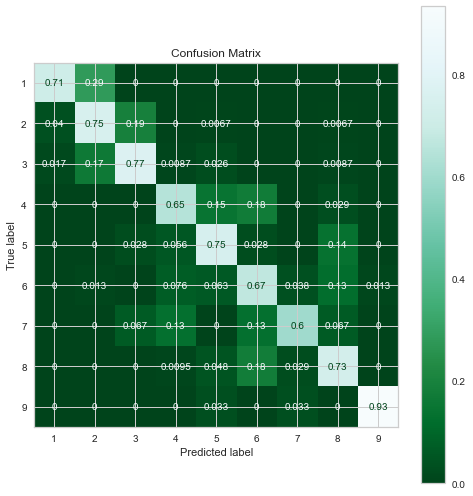

In [106]:
parameter = {'model__criterion': ['gini','entropy'],
             'model__min_samples_leaf': [1,3,5],
             'model__class_weight': [None, 'balanced']}
best_DT_robust_params , best_DT_robust  = gridsearch_result(DT_vanilla,parameter,X_train_model,y_train_model,X_validation,y_validation)

In [107]:
best_DT_robust

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(weights='distance')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Depth', 'GR', 'ILD_log10',
                                                   'DeltaPHI', 'PHIND', 'PE',
                                                   'RELPOS']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('impute',
                                                                   KNNImputer(weights='distance'))]),
                                                  ['Formation', 'Well Name',
                                                   'NM_M'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy'))])

In [108]:
best_DT_robust_params

{'model__class_weight': 'balanced',
 'model__criterion': 'entropy',
 'model__min_samples_leaf': 1}

#### QuantileTransformer



BEST ESTIMATOR PARAMETERS
{'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__min_samples_leaf': 1}


MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.833333    0.790210    0.733871   0.600000   0.568182   0.613636   
recall      0.714286    0.753333    0.791304   0.617647   0.694444   0.683544   
f1-score    0.769231    0.771331    0.761506   0.608696   0.625000   0.646707   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.615385    0.795699   0.966667  0.734323    0.724109   
recall      0.533333    0.704762   0.966667  0.734323    0.717702   
f1-score    0.571429    0.747475   0.966667  0.734323    0.718671   
support    15.000000  105.000000  30.000000  0.734323  606.000000   

           weighted avg  
precision      0.740986  
recall         0.734323  
f1-score       0.735845  
support      606.000000



----------------------------------------


Visual Evaluation


None

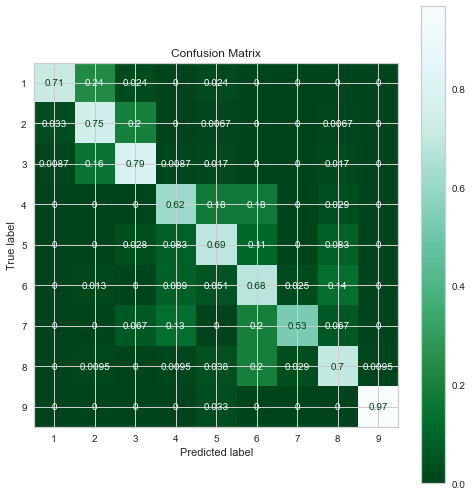

In [109]:
#Quantile Model
preprocessor_quantile_DT = preprocessing_trial(numerical,categorical,transformation = QuantileTransformer())
DT_quantile_pipeline = model_pipeline(DecisionTreeClassifier(), preprocessor_quantile_DT)
DT_quantile = DT_quantile_pipeline.fit(X_train_model, y_train_model)

#Quantile GridSearch:
parameter = {'model__criterion': ['gini','entropy'],
             'model__min_samples_leaf': [1,3,5],
             'model__class_weight': [None, 'balanced']}

best_DT_quantile_params , best_DT_quantile = gridsearch_result(DT_quantile,parameter,X_train_model,y_train_model,X_validation,y_validation)

#### PowerTransformer



BEST ESTIMATOR PARAMETERS
{'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__min_samples_leaf': 1}


MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.833333    0.790210    0.729508   0.645161   0.581395   0.627907   
recall      0.714286    0.753333    0.773913   0.588235   0.694444   0.683544   
f1-score    0.769231    0.771331    0.751055   0.615385   0.632911   0.654545   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.571429    0.766990   0.928571  0.732673    0.719389   
recall      0.533333    0.752381   0.866667  0.732673    0.706682   
f1-score    0.551724    0.759615   0.896552  0.732673    0.711372   
support    15.000000  105.000000  30.000000  0.732673  606.000000   

           weighted avg  
precision      0.737389  
recall         0.732673  
f1-score       0.733874  
support      606.000000



----------------------------------------


Visual Evaluation


None

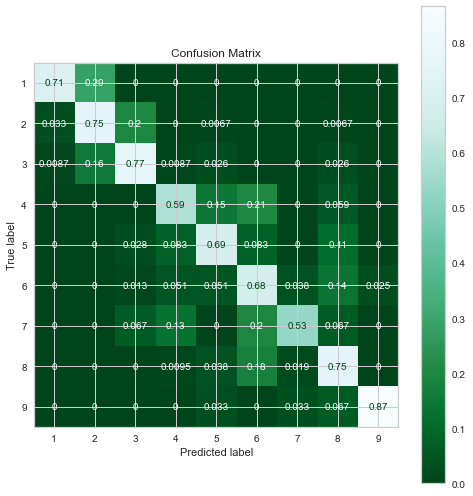

In [110]:
#Power Model
preprocessor_power_DT = preprocessing_trial(numerical,categorical,transformation = PowerTransformer())
DT_power_pipeline = model_pipeline(DecisionTreeClassifier(), preprocessor_power_DT)
DT_power = DT_power_pipeline.fit(X_train_model, y_train_model)

#Power GridSearch:
parameter = {'model__criterion': ['gini','entropy'],
             'model__min_samples_leaf': [1,3,5],
             'model__class_weight': [None, 'balanced']}

best_DT_power_params , best_DT_power = gridsearch_result(DT_power,parameter,X_train_model,y_train_model,X_validation,y_validation)

### Visualization and Best Estimator Selection

#### Best Estimator

In [111]:
def score_compare(models, X_test, y_test, parameters,parameter_name, target_variable,
                  classification_score = 'f1-score', palette='mako'):
    
    #Dictionary of all scores
    
    scores = {}
    for i in range(len(parameters)):
        y_hat = models[i].predict(X_test)
        report = pd.DataFrame(metrics.classification_report(y_test,y_hat,output_dict=True))
        scores[parameters[i]]=report.loc[classification_score]
    
    #table
    
    f1_table = pd.DataFrame(scores).reset_index()
    f1_table = f1_table.rename(columns = {'index':target_variable})
    f1_table_formation = f1_table.loc[:(len(f1_table)-4)]
    
    table = pd.melt(f1_table_formation, id_vars=[target_variable],
                    value_name=classification_score, var_name = parameter_name)
    
    #plot
    
    fig,axes = plt.subplots(figsize = (10,6))
    sns.barplot(target_variable, classification_score, hue = parameter_name, data = table, palette=palette, ax=axes);
    axes.set_title('Individual Analysis')

In [112]:
def f1_compare(models, X_test, y_test, parameters,average='macro'):
    
    print('\n'+formating.underline+f'Average f1_score'+'\n')
    
    f1_macro = {}
    for i in range(len(parameters)):
        y_hat_ = models[i].predict(X_test)
        f1 = round(metrics.f1_score(y_test,y_hat_,average=average),5)
        f1_macro[parameters[i]]=f1
    
    return f1_macro


Average f1_score



{'RobustScaler': 0.72552,
 'QuantileTransformer': 0.71867,
 'PowerTransformer': 0.71137}

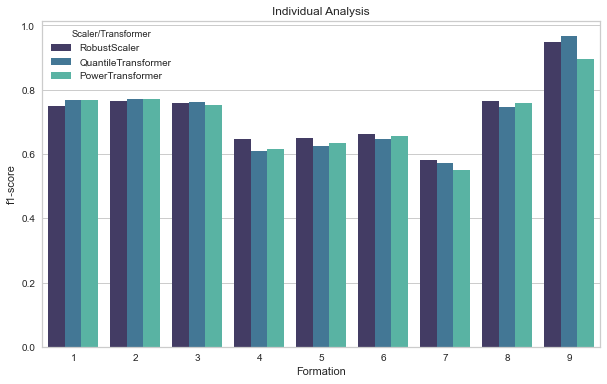

In [113]:
models = [best_DT_robust,best_DT_quantile,best_DT_power]

score_compare(models, X_validation, y_validation, parameters=description,parameter_name='Scaler/Transformer',
              target_variable='Formation')
f1_compare(models, X_validation, y_validation, parameters=description)

##### Therefore the best DecisionTree estimator is : Final Model - `best_DT_quantile` 

In [114]:
best_DT_quantile,best_DT_quantile_params

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('impute',
                                                                    KNNImputer(weights='distance')),
                                                                   ('scaler',
                                                                    QuantileTransformer())]),
                                                   ['Depth', 'GR', 'ILD_log10',
                                                    'DeltaPHI', 'PHIND', 'PE',
                                                    'RELPOS']),
                                                  ('cat',
                                                   Pipeline(steps=[('ohe',
                                                                    OneHotEncoder(drop='first',
                                                                                  sparse=False)),
       

#### Model Visualization

In [115]:
# #Feature Importances
# best_DT = best_DT_quantile.fit(X_train_model,y_train_model)
# best_DT.feature_importances_



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


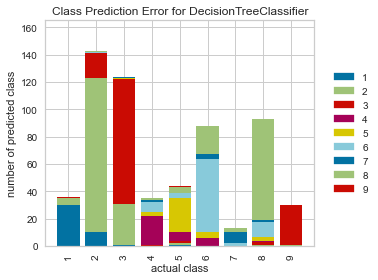



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


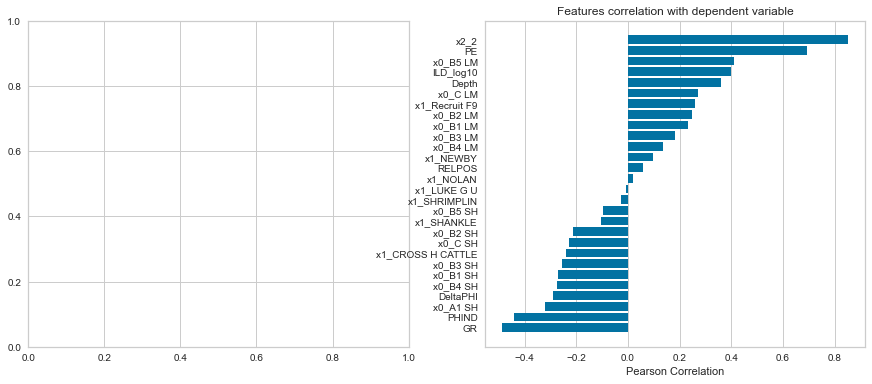

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


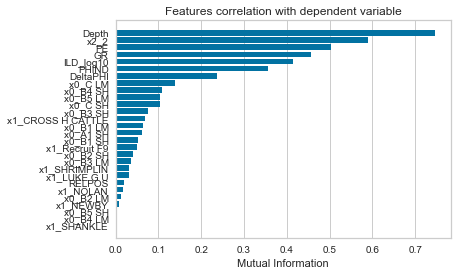



----------------------------------------------------------------------------------------------------


RANK FEATURES



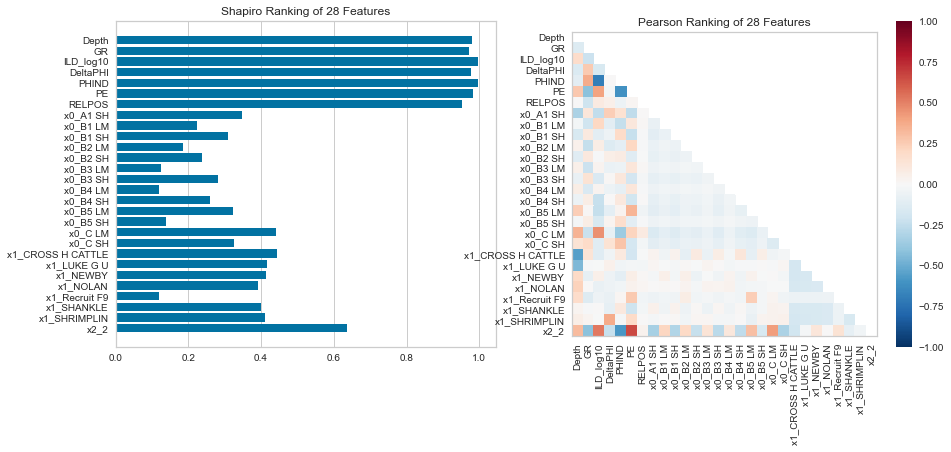

In [116]:
model_visuals(best_DT_quantile,
              X_train_model,y_train_model,X_validation,y_validation,
              numerical,categorical,cols_j)

In [117]:
best_DT_quantile.named_steps['model']

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

In [118]:
explained_weights(best_DT_quantile.named_steps['model'])

Explanation(estimator="DecisionTreeClassifier(class_weight='balanced', criterion='entropy')", description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='x2_2', weight=0.2586334280047962, std=None, value=None), FeatureWeight(feature='Depth', weight=0.1273614958598908, std=None, value=None), FeatureWeight(feature='RELPOS', weight=0.10158138097248151, std=None, value=None), FeatureWeight(feature='ILD_log10', weight=0.09984545833315367, std=None, value=None), FeatureWeight(feature='PE', weight=0.09170177091241266, std=None, value=None), FeatureWeight(feature='GR', weight=0.08523458271029477, std=None, value=None), FeatureWeight(feature='DeltaPHI', weight=0.06239805110814645, std=None, value=None), FeatureWeight(feature='PHIND', weight=0.0453512880050719, std=None, value=None), FeatureWeight(feature='x1_CROSS H CATTLE', weight=0.0276996528288295, std=None, value=None), FeatureWeight(feature='x1_SHANKLE', weight=0.02058842645611908, std=None, value=None), FeatureWeight(feature='x1_NOLAN', weight=0.016972614825159504, std=None, value=None), FeatureWeight(feature='x0_C LM', weight=0.013917664912228336, std=None, value=None), FeatureWeight(feature='x1_NEWBY', weight=0.010214275744203966, std=None, value=None), FeatureWeight(feature='x0_B2 LM', weight=0.009131720218081105, std=None, value=None), FeatureWeight(feature='x0_B3 LM', weight=0.005771001935316524, std=None, value=None), FeatureWeight(feature='x0_B1 LM', weight=0.004735235271894274, std=None, value=None), FeatureWeight(feature='x1_LUKE G U', weight=0.0040074238381536224, std=None, value=None), FeatureWeight(feature='x0_A1 SH', weight=0.0036242544673212905, std=None, value=None), FeatureWeight(feature='x0_B5 LM', weight=0.003111837592303466, std=None, value=None), FeatureWeight(feature='x0_B1 SH', weight=0.0017814972188612787, std=None, value=None), FeatureWeight(feature='x1_SHRIMPLIN', weight=0.0014645690869920245, std=None, value=None), FeatureWeight(feature='x0_B3 SH', weight=0.001450555037735999, std=None, value=None), FeatureWeight(feature='x0_C SH', weight=0.0011893512096370913, std=None, value=None), FeatureWeight(feature='x0_B4 LM', weight=0.0010440021661045375, std=None, value=None), FeatureWeight(feature='x0_B2 SH', weight=0.0007006207765321257, std=None, value=None), FeatureWeight(feature='x0_B5 SH', weight=0.00029986318283908283, std=None, value=None), FeatureWeight(feature='x0_B4 SH', weight=0.0001879773254391313, std=None, value=None), FeatureWeight(feature='x1_Recruit F9', weight=0.0, std=None, value=None)], remaining=0), decision_tree=TreeInfo(criterion='entropy', tree=NodeInfo(id=0, is_leaf=False, value=[201.88888888888815, 201.8888888888903, 201.88888888888803, 201.88888888888908, 201.88888888888863, 201.888888888888, 201.88888888888906, 201.88888888888974, 201.88888888888923], value_ratio=[0.11111111111111069, 0.11111111111111188, 0.11111111111111063, 0.1111111111111112, 0.11111111111111095, 0.1111111111111106, 0.11111111111111119, 0.11111111111111156, 0.11111111111111129], impurity=3.1699250014423215, samples=1817, sample_ratio=1.0, feature_name='x2_2', feature_id=27, threshold=0.5, left=NodeInfo(id=1, is_leaf=False, value=[201.88888888888815, 201.38542532557636, 197.8044315992285, 7.764957264957265, 12.423931623931624, 0.7533167495854063, 0.0, 7.3951973951973935, 0.0], value_ratio=[0.3207558135561069, 0.3199559237467435, 0.31426653409109884, 0.01233676205985031, 0.019738819295760497, 0.0011968500505824928, 0.0, 0.011749297199857435, 0.0], impurity=1.8539647267657073, samples=906, sample_ratio=0.49862410566868465, feature_name='x1_CROSS H CATTLE', feature_id=20, threshold=0.5, left=NodeInfo(id=2, is_leaf=False, value=[71.50231481481481, 160.60487669714698, 182.63359023763599, 1.9412393162393162, 4.658974358974359, 0.7533167495854063, 0.0, 5.916157916157915, 0.0], valu

In [119]:
best_DT_quantile.named_steps['model'].feature_importances_

array([1.27361496e-01, 8.52345827e-02, 9.98454583e-02, 6.23980511e-02,
       4.53512880e-02, 9.17017709e-02, 1.01581381e-01, 3.62425447e-03,
       4.73523527e-03, 1.78149722e-03, 9.13172022e-03, 7.00620777e-04,
       5.77100194e-03, 1.45055504e-03, 1.04400217e-03, 1.87977325e-04,
       3.11183759e-03, 2.99863183e-04, 1.39176649e-02, 1.18935121e-03,
       2.76996528e-02, 4.00742384e-03, 1.02142757e-02, 1.69726148e-02,
       0.00000000e+00, 2.05884265e-02, 1.46456909e-03, 2.58633428e-01])

FEATURE IMPORTANCES



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


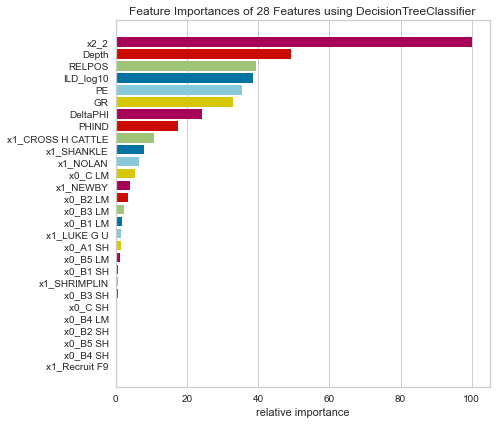

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


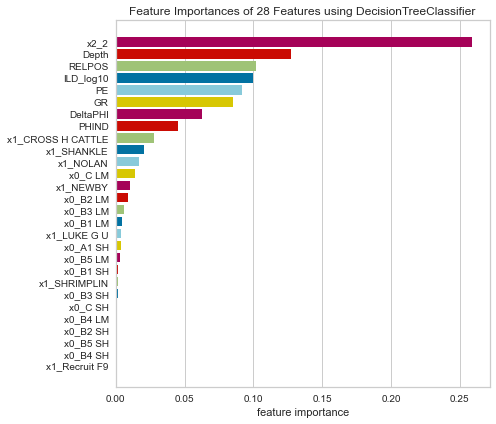

In [120]:
feature_importances(best_DT_quantile.named_steps['model'],X_train_feature_j_df,y_train_model)

## Random Forest



MODEL EVALUATION


Classification Report


1           2           3          4      5          6  \
precision   0.888889    0.832258    0.834783   0.648649   0.75   0.733333   
recall      0.761905    0.860000    0.834783   0.705882   0.75   0.696203   
f1-score    0.820513    0.845902    0.834783   0.676056   0.75   0.714286   
support    42.000000  150.000000  115.000000  34.000000  36.00  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.846154    0.816514   0.966667  0.811881    0.813027   
recall      0.733333    0.847619   0.966667  0.811881    0.795155   
f1-score    0.785714    0.831776   0.966667  0.811881    0.802855   
support    15.000000  105.000000  30.000000  0.811881  606.000000   

           weighted avg  
precision      0.812848  
recall         0.811881  
f1-score       0.811689  
support      606.000000



----------------------------------------


Visual Evaluation


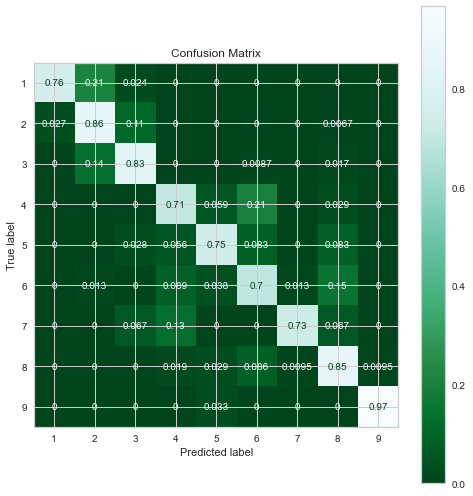

In [121]:
preprocessor_RF = preprocessing_trial(numerical,categorical,transformation = RobustScaler())
RF_vanilla_pipeline = model_pipeline(RandomForestClassifier(), preprocessor_RF)
RF_vanilla = RF_vanilla_pipeline.fit(X_train_model, y_train_model)
model_evaluation(RF_vanilla,X_validation,y_validation)

### GridSearchCV and Effect of Transformers

#### RobustScaler



BEST ESTIMATOR PARAMETERS
{'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__min_samples_leaf': 1}


MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.941176    0.840764    0.849558   0.641026   0.675676   0.767123   
recall      0.761905    0.880000    0.834783   0.735294   0.694444   0.708861   
f1-score    0.842105    0.859935    0.842105   0.684932   0.684932   0.736842   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.733333    0.788991   1.000000  0.811881    0.804183   
recall      0.733333    0.819048   0.966667  0.811881    0.792704   
f1-score    0.733333    0.803738   0.983051  0.811881    0.796775   
support    15.000000  105.000000  30.000000  0.811881  606.000000   

           weighted avg  
precision      0.815032  
recall         0.811881  
f1-score       0.812278  
support      606.000000



----------------------------------------


Visual Evaluation


None

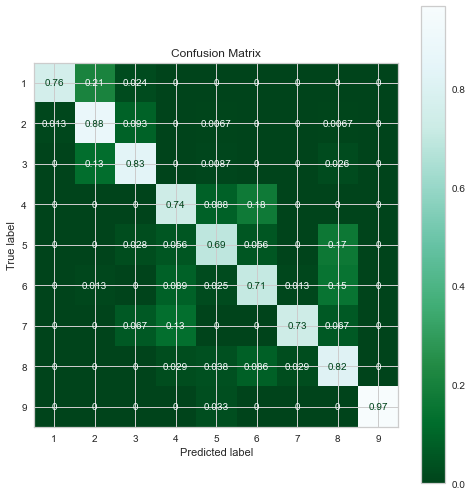

In [122]:
parameter = {'model__criterion': ['gini','entropy'],
             'model__min_samples_leaf': [1,3,5],
             'model__class_weight': [None, 'balanced']}
best_RF_robust_params , best_RF_robust = gridsearch_result(RF_vanilla,parameter,X_train_model,y_train_model,X_validation,y_validation)

#### QuantileTransformer



BEST ESTIMATOR PARAMETERS
{'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__min_samples_leaf': 1}


MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.916667    0.837662    0.826087   0.666667   0.729730   0.700000   
recall      0.785714    0.860000    0.826087   0.705882   0.750000   0.708861   
f1-score    0.846154    0.848684    0.826087   0.685714   0.739726   0.704403   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.785714    0.809524   1.000000  0.806931    0.808006   
recall      0.733333    0.809524   0.966667  0.806931    0.794008   
f1-score    0.758621    0.809524   0.983051  0.806931    0.800218   
support    15.000000  105.000000  30.000000  0.806931  606.000000   

           weighted avg  
precision      0.808865  
recall         0.806931  
f1-score       0.807433  
support      606.000000



----------------------------------------


Visual Evaluation


None

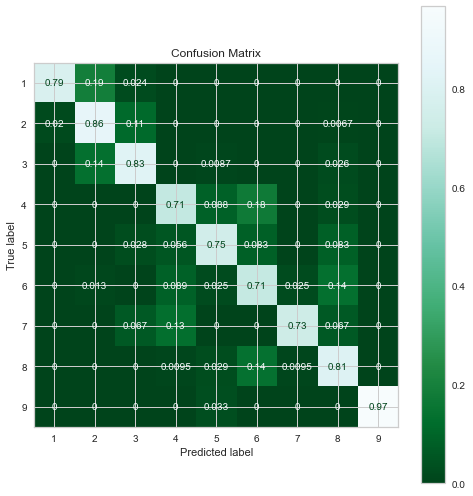

In [123]:
#Quantile Model
preprocessor_quantile_RF = preprocessing_trial(numerical,categorical,transformation = QuantileTransformer())
RF_quantile_pipeline = model_pipeline(RandomForestClassifier(), preprocessor_quantile_RF)
RF_quantile = RF_quantile_pipeline.fit(X_train_model, y_train_model)

#Quantile GridSearch:
parameter = {'model__criterion': ['gini','entropy'],
             'model__min_samples_leaf': [1,3,5],
             'model__class_weight': [None, 'balanced']}

best_RF_quantile_params , best_RF_quantile = gridsearch_result(RF_quantile,parameter,X_train_model,y_train_model,X_validation,y_validation)

#### PowerTransformer



BEST ESTIMATOR PARAMETERS
{'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__min_samples_leaf': 1}


MODEL EVALUATION


Classification Report


1           2           3          4      5          6  \
precision   0.939394    0.832258    0.822034   0.705882   0.75   0.737500   
recall      0.738095    0.860000    0.843478   0.705882   0.75   0.746835   
f1-score    0.826667    0.845902    0.832618   0.705882   0.75   0.742138   
support    42.000000  150.000000  115.000000  34.000000  36.00  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.785714    0.803738   1.000000  0.813531    0.819613   
recall      0.733333    0.819048   0.966667  0.813531    0.795927   
f1-score    0.758621    0.811321   0.983051  0.813531    0.806244   
support    15.000000  105.000000  30.000000  0.813531  606.000000   

           weighted avg  
precision      0.815624  
recall         0.813531  
f1-score       0.813605  
support      606.000000



----------------------------------------


Visual Evaluation


None

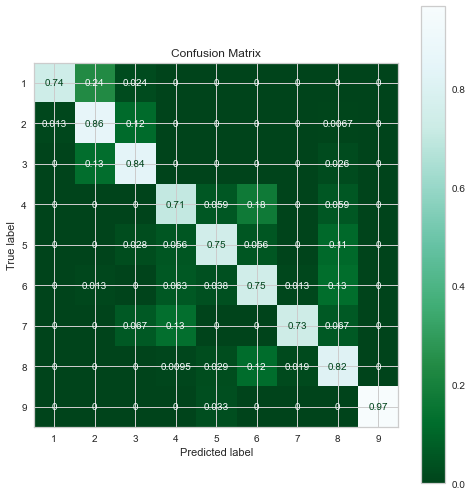

In [124]:
#Power Model
preprocessor_power_RF = preprocessing_trial(numerical,categorical,transformation = PowerTransformer())
RF_power_pipeline = model_pipeline(RandomForestClassifier(), preprocessor_power_RF)
RF_power = RF_power_pipeline.fit(X_train_model, y_train_model)

#Power GridSearch:
parameter = {'model__criterion': ['gini','entropy'],
             'model__min_samples_leaf': [1,3,5],
             'model__class_weight': [None, 'balanced']}

best_RF_power_params , best_RF_power = gridsearch_result(RF_power,parameter,X_train_model,y_train_model,X_validation,y_validation)

### Visualization and Best Estimator Selection

#### Best Estimator


Average f1_score



{'RobustScaler': 0.79677,
 'QuantileTransformer': 0.80022,
 'PowerTransformer': 0.80624}

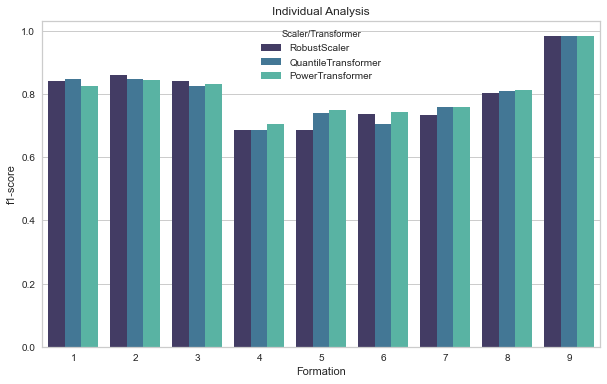

In [125]:
models = [best_RF_robust,best_RF_quantile,best_RF_power]

score_compare(models, X_validation, y_validation, parameters=description,parameter_name='Scaler/Transformer',
              target_variable='Formation')
f1_compare(models, X_validation, y_validation, parameters=description)

##### Therefore the best DecisionTree estimator is : Final Model - `best_RF_quantile` 

In [126]:
best_RF_quantile_params,best_RF_quantile

({'model__class_weight': 'balanced',
  'model__criterion': 'gini',
  'model__min_samples_leaf': 1},
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('impute',
                                                                    KNNImputer(weights='distance')),
                                                                   ('scaler',
                                                                    QuantileTransformer())]),
                                                   ['Depth', 'GR', 'ILD_log10',
                                                    'DeltaPHI', 'PHIND', 'PE',
                                                    'RELPOS']),
                                                  ('cat',
                                                   Pipeline(steps=[('ohe',
                                                                    OneHotEncoder(drop='first',
     

#### Model Visualization



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


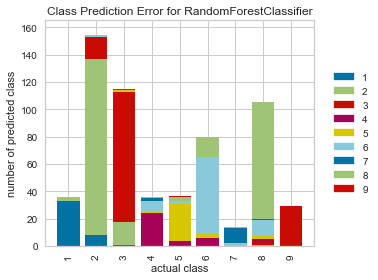



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


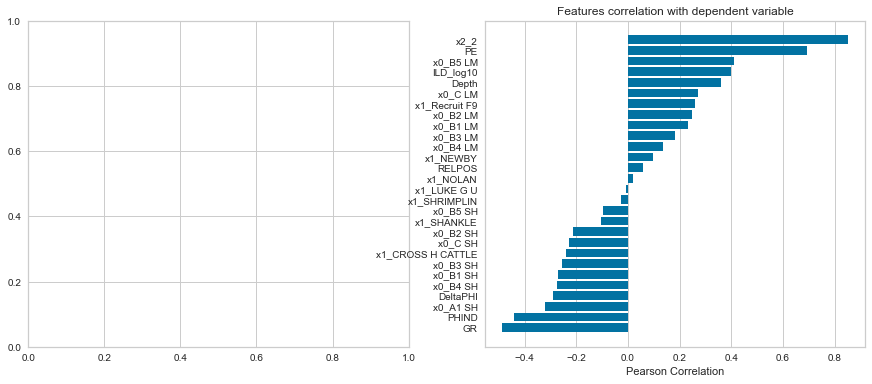

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


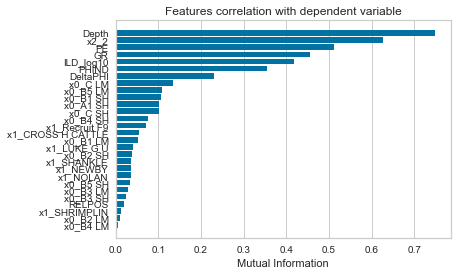



----------------------------------------------------------------------------------------------------


RANK FEATURES



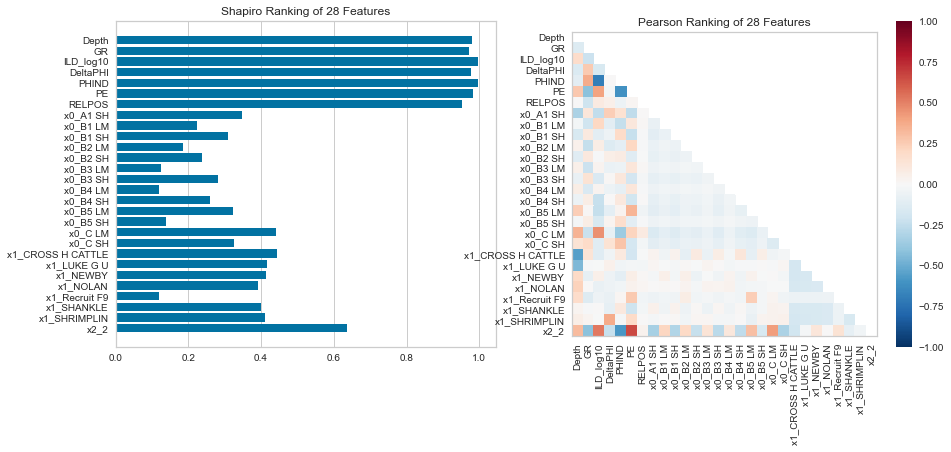

In [127]:
model_visuals(best_RF_quantile,X_train_model,y_train_model,X_validation,y_validation,numerical,categorical,cols_j)

In [128]:
best_RF_quantile.named_steps['model']

RandomForestClassifier(class_weight='balanced')

FEATURE IMPORTANCES



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


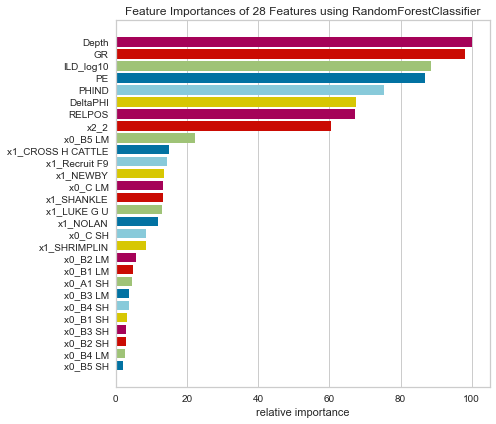

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


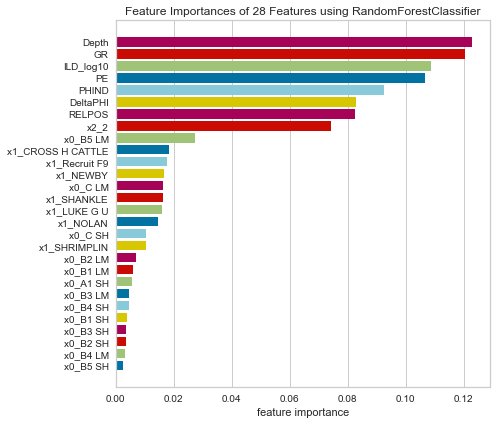

In [129]:
feature_importances(best_RF_quantile.named_steps['model'],X_train_feature_j_df,y_train_model)

In [130]:
explained_weights(best_RF_quantile.named_steps['model'])

Explanation(estimator="RandomForestClassifier(class_weight='balanced')", description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Depth', weight=0.12277434729521991, std=0.024490832794256758, value=None), FeatureWeight(feature='GR', weight=0.1205516426221223, std=0.023133928057798656, value=None), FeatureWeight(feature='ILD_log10', weight=0.10883915423724556, std=0.025785011438921486, value=None), FeatureWeight(feature='PE', weight=0.10666870710783867, std=0.03280663898223614, value=None), FeatureWeight(feature='PHIND', weight=0.09264849482587686, std=0.022529906807801328, value=None), FeatureWeight(feature='DeltaPHI', weight=0.08269437132274256, std=0.020094399987987944, value=None), FeatureWeight(feature='RELPOS', weight=0.08261709611713443, std=0.015841912971759388, value=None), FeatureWeight(feature='x2_2', weight=0.07417123775789813, std=0.028927746696541357, value=None), FeatureWeight(feature='x0_B5 LM', weight=0.027500903651822877, std=0.018217741388480247, value=None), FeatureWeight(feature='x1_CROSS H CATTLE', weight=0.0183070611803328, std=0.010391413152939346, value=None), FeatureWeight(feature='x1_Recruit F9', weight=0.017530470303696206, std=0.015849800559730426, value=None), FeatureWeight(feature='x1_NEWBY', weight=0.01654532400711398, std=0.005899727242547918, value=None), FeatureWeight(feature='x0_C LM', weight=0.016407119121317336, std=0.00852436385011078, value=None), FeatureWeight(feature='x1_SHANKLE', weight=0.016258469052231318, std=0.008004093178146038, value=None), FeatureWeight(feature='x1_LUKE G U', weight=0.016017341383880463, std=0.00858446731533958, value=None), FeatureWeight(feature='x1_NOLAN', weight=0.014643577180438985, std=0.006126996219567856, value=None), FeatureWeight(feature='x0_C SH', weight=0.01044473118196964, std=0.008739732204289306, value=None), FeatureWeight(feature='x1_SHRIMPLIN', weight=0.0103318060629371, std=0.005385046507974025, value=None), FeatureWeight(feature='x0_B2 LM', weight=0.007118577861019125, std=0.005592114289213834, value=None), FeatureWeight(feature='x0_B1 LM', weight=0.0058295947611519475, std=0.0033895462820047414, value=None), FeatureWeight(feature='x0_A1 SH', weight=0.005777589424241452, std=0.004165504070951271, value=None), FeatureWeight(feature='x0_B3 LM', weight=0.004679246102092965, std=0.0036394512177583284, value=None), FeatureWeight(feature='x0_B4 SH', weight=0.004655353153889884, std=0.0045753987917222586, value=None), FeatureWeight(feature='x0_B1 SH', weight=0.0040128448017161585, std=0.0027648982231313606, value=None), FeatureWeight(feature='x0_B3 SH', weight=0.0035130465131397036, std=0.00225611270968193, value=None), FeatureWeight(feature='x0_B2 SH', weight=0.0034932229842347725, std=0.002439414920216603, value=None), FeatureWeight(feature='x0_B4 LM', weight=0.003311267057992411, std=0.0022771389370888633, value=None), FeatureWeight(feature='x0_B5 SH', weight=0.0026574029287025095, std=0.00222370520648229, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## SVM



MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.800000    0.811688    0.789474   0.666667   0.647059   0.654762   
recall      0.761905    0.833333    0.782609   0.647059   0.611111   0.696203   
f1-score    0.780488    0.822368    0.786026   0.656716   0.628571   0.674847   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

               7           8          9  accuracy   macro avg  weighted avg  
precision   0.90    0.727273   0.962963  0.760726    0.773321      0.763337  
recall      0.60    0.761905   0.866667  0.760726    0.728977      0.760726  
f1-score    0.72    0.744186   0.912281  0.760726    0.747276      0.760902  
support    15.00  105.000000  30.000000  0.760726  606.000000    606.000000



----------------------------------------


Visual Evaluation


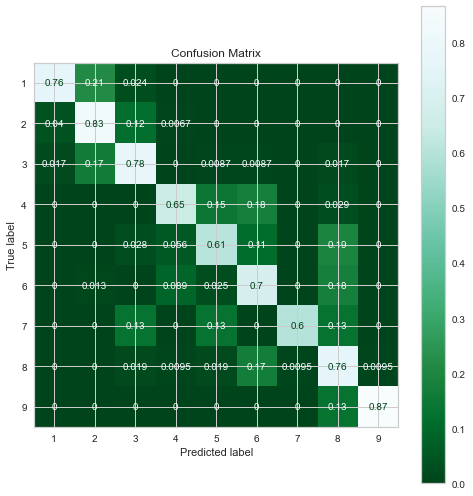

In [131]:
preprocessor_SVM = preprocessing_trial(numerical,categorical,transformation = RobustScaler())
SVM_vanilla_pipeline = model_pipeline(SVC(), preprocessor_SVM)
SVM_vanilla = SVM_vanilla_pipeline.fit(X_train_model, y_train_model)
model_evaluation(SVM_vanilla,X_validation,y_validation)

### GridSearchCV and Effect of Transformers

#### RobustScaler

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py", line 181, in fit
    .format(X.shape[0], X.shape[1]))
ValueError: Precomputed matrix must be a square matrix. Input is a 1453x28 matrix.

  FitFailedWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit f



BEST ESTIMATOR PARAMETERS
{'model__class_weight': None, 'model__kernel': 'rbf'}


MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.800000    0.811688    0.789474   0.666667   0.647059   0.654762   
recall      0.761905    0.833333    0.782609   0.647059   0.611111   0.696203   
f1-score    0.780488    0.822368    0.786026   0.656716   0.628571   0.674847   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

               7           8          9  accuracy   macro avg  weighted avg  
precision   0.90    0.727273   0.962963  0.760726    0.773321      0.763337  
recall      0.60    0.761905   0.866667  0.760726    0.728977      0.760726  
f1-score    0.72    0.744186   0.912281  0.760726    0.747276      0.760902  
support    15.00  105.000000  30.000000  0.760726  606.000000    606.000000



----------------------------------------


Visual Evaluation


None

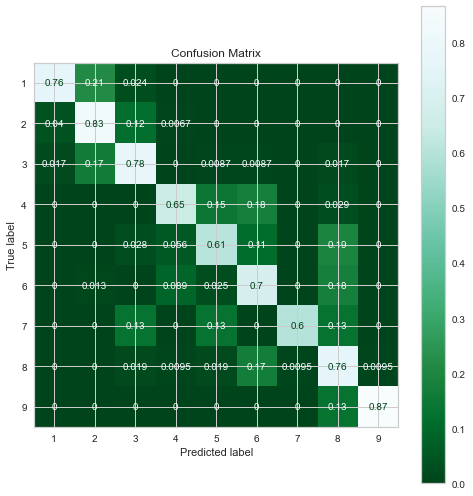

In [132]:
parameter = {'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'model__class_weight': [None, 'balanced']}
best_SVM_robust_params , best_SVM_robust = gridsearch_result(SVM_vanilla,parameter,X_train_model,y_train_model,X_validation,y_validation)

#### QuantileTransformer

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py", line 181, in fit
    .format(X.shape[0], X.shape[1]))
ValueError: Precomputed matrix must be a square matrix. Input is a 1453x28 matrix.

  FitFailedWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit f



BEST ESTIMATOR PARAMETERS
{'model__class_weight': None, 'model__kernel': 'poly'}


MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.725490    0.845070    0.810811   0.676471   0.648649   0.651163   
recall      0.880952    0.800000    0.782609   0.676471   0.666667   0.708861   
f1-score    0.795699    0.821918    0.796460   0.676471   0.657534   0.678788   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.750000    0.752381   0.928571  0.765677    0.754290   
recall      0.600000    0.752381   0.866667  0.765677    0.748290   
f1-score    0.666667    0.752381   0.896552  0.765677    0.749163   
support    15.000000  105.000000  30.000000  0.765677  606.000000   

           weighted avg  
precision      0.769595  
recall         0.765677  
f1-score       0.766488  
support      606.000000



----------------------------------------


Visual Evaluation


None

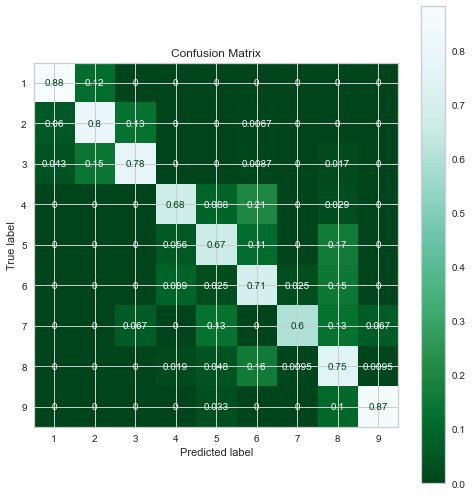

In [133]:
#Quantile Model
preprocessor_quantile_SVM = preprocessing_trial(numerical,categorical,transformation = QuantileTransformer())
SVM_quantile_pipeline = model_pipeline(SVC(), preprocessor_quantile_SVM)
SVM_quantile = SVM_quantile_pipeline.fit(X_train_model, y_train_model)

#Quantile GridSearch
parameter = {'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'model__class_weight': [None, 'balanced']}
best_SVM_quantile_params , best_SVM_quantile = gridsearch_result(SVM_quantile,parameter,X_train_model,y_train_model,X_validation,y_validation)

#### PowerTransformer

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py", line 181, in fit
    .format(X.shape[0], X.shape[1]))
ValueError: Precomputed matrix must be a square matrix. Input is a 1453x28 matrix.

  FitFailedWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit f



BEST ESTIMATOR PARAMETERS
{'model__class_weight': None, 'model__kernel': 'rbf'}


MODEL EVALUATION


Classification Report


1           2           3          4          5          6  \
precision   0.815789    0.797468    0.794643   0.615385   0.714286   0.679487   
recall      0.738095    0.840000    0.773913   0.705882   0.555556   0.670886   
f1-score    0.775000    0.818182    0.784141   0.657534   0.625000   0.675159   
support    42.000000  150.000000  115.000000  34.000000  36.000000  79.000000   

               7           8          9  accuracy   macro avg  weighted avg  
precision   0.90    0.741379   0.962963  0.765677    0.780156      0.768676  
recall      0.60    0.819048   0.866667  0.765677    0.730005      0.765677  
f1-score    0.72    0.778281   0.912281  0.765677    0.749509      0.764909  
support    15.00  105.000000  30.000000  0.765677  606.000000    606.000000



----------------------------------------


Visual Evaluation


None

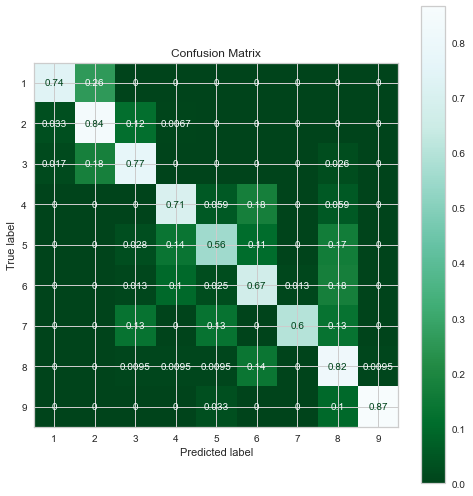

In [134]:
#Power Model
preprocessor_power_SVM = preprocessing_trial(numerical,categorical,transformation = PowerTransformer())
SVM_power_pipeline = model_pipeline(SVC(), preprocessor_power_SVM)
SVM_power = SVM_power_pipeline.fit(X_train_model, y_train_model)

#Power GridSearch:
parameter = {'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'model__class_weight': [None, 'balanced']}
best_SVM_power_params , best_SVM_power = gridsearch_result(SVM_power,parameter,X_train_model,y_train_model,X_validation,y_validation)

### Visualization and Best Estimator Selection

#### Best Estimator


Average f1_score



{'RobustScaler': 0.74728,
 'QuantileTransformer': 0.74916,
 'PowerTransformer': 0.74951}

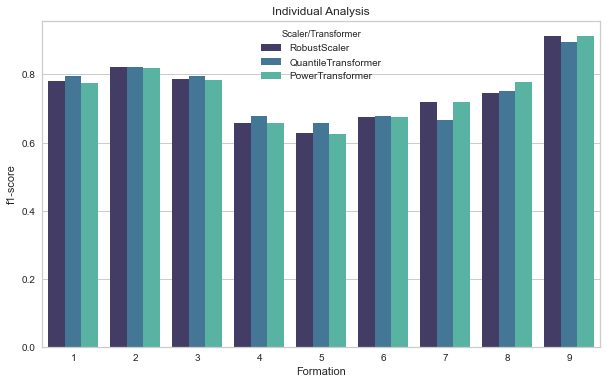

In [135]:
models = [best_SVM_robust,best_SVM_quantile,best_SVM_power]

score_compare(models, X_validation, y_validation, parameters=description,parameter_name='Scaler/Transformer',
              target_variable='Formation')
f1_compare(models, X_validation, y_validation, parameters=description)

##### Therefore the best DecisionTree estimator is : Final Model - `best_RF_quantile` 

In [136]:
best_SVM_power_params,best_SVM_power

({'model__class_weight': None, 'model__kernel': 'rbf'},
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('impute',
                                                                    KNNImputer(weights='distance')),
                                                                   ('scaler',
                                                                    PowerTransformer())]),
                                                   ['Depth', 'GR', 'ILD_log10',
                                                    'DeltaPHI', 'PHIND', 'PE',
                                                    'RELPOS']),
                                                  ('cat',
                                                   Pipeline(steps=[('ohe',
                                                                    OneHotEncoder(drop='first',
                                                    

#### Model Evaluation



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


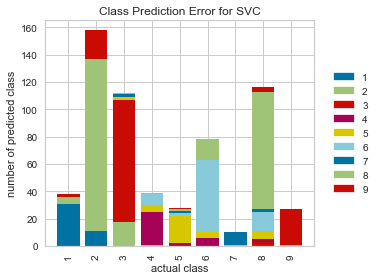



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


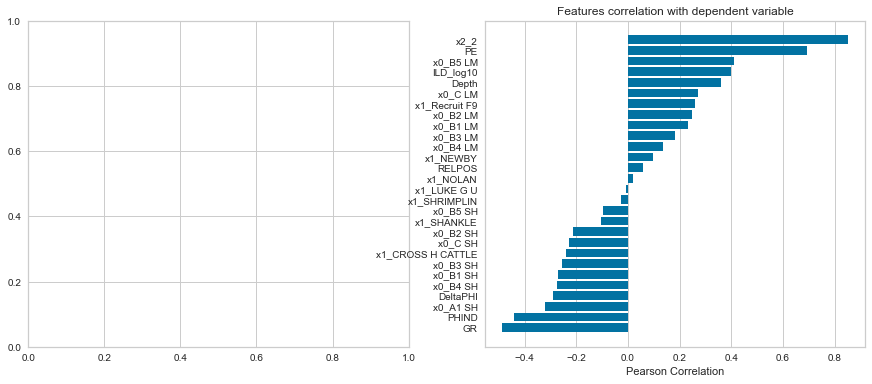

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


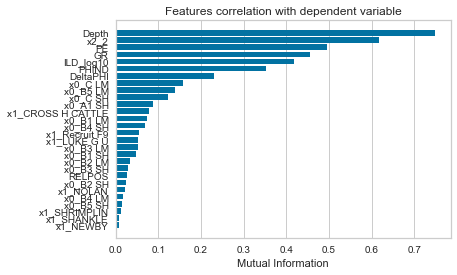



----------------------------------------------------------------------------------------------------


RANK FEATURES



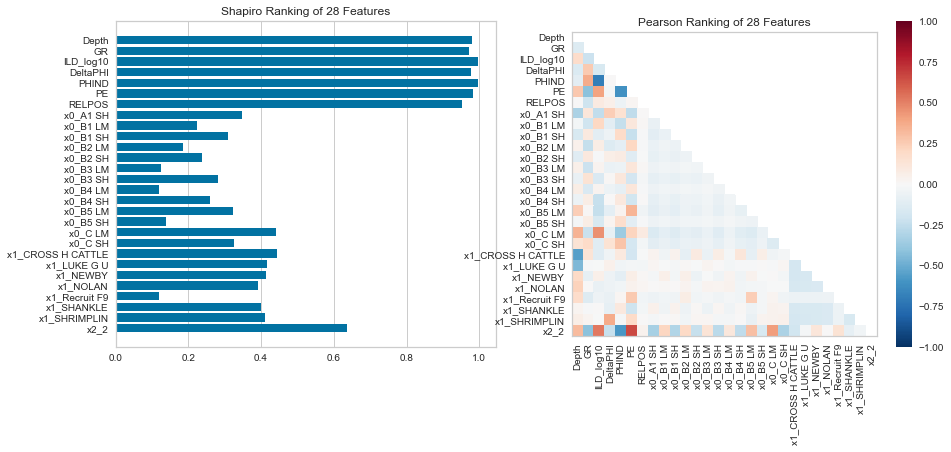

In [137]:
model_visuals(best_SVM_power,X_train_model,y_train_model,X_validation,y_validation,numerical,categorical,cols_j)

In [138]:
best_SVM_power.named_steps['model']

SVC()

FEATURE IMPORTANCES

Feature Importances is not compatable with this classifier


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


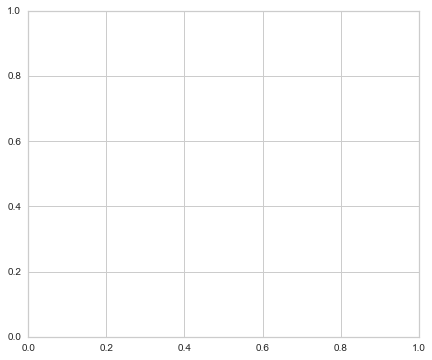

In [139]:
feature_importances(best_SVM_power.named_steps['model'],X_train_feature_j_df,y_train_model)

In [140]:
explained_weights(best_SVM_power.named_steps['model'])

Explanation(estimator='SVC()', description=None, error="only kernel='linear' is currently supported for libsvm-based classifiers", method=None, is_regression=False, targets=None, feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## Stacking Classifier

In [141]:
# estimators = [final_KNN,best_DT_quantile,best_RF_quantile,best_SVM_power]
# sc = StackingClassifier(estimators)
# sc_model = sc.fit(X_train_model,y_train_model)
# model_evaluation(sc_model,X_validation,y_validation)

In [142]:
X_validation_feature_j_df = preprocessing_trial(numerical,categorical).fit_transform(X_validation)
X_validation_feature_j_df = pd.DataFrame(X_validation_feature_j_df,columns = cols_j)
X_validation_feature_j_df

Depth        GR  ILD_log10  DeltaPHI     PHIND        PE    RELPOS  \
0    0.336781  1.628918  -1.089498  0.972215  0.887795 -0.302402 -1.330364   
1    0.757319  0.058227   1.721095 -0.593668 -2.065167  1.319860 -1.477004   
2   -0.797519  0.538809   0.065069 -0.536746 -1.654760  0.876101  1.652429   
3   -2.015450  0.749269   0.012908  1.858334  0.271775 -0.634182  1.126481   
4    0.279093  0.874145  -0.960685  2.180736  0.518055 -0.548905  0.256686   
..        ...       ...        ...       ...       ...       ...       ...   
601  1.469620 -0.216393   0.192771  0.239199  0.104973 -0.898776  1.236974   
602 -0.696842  0.391694   0.039402  2.280966  0.189630 -0.067121  1.300434   
603 -1.573829  0.844531  -1.096095 -2.663047  1.513485 -1.625339 -1.502763   
604 -1.355036 -0.733153   1.985809 -0.481008 -2.103001  0.680919 -0.574737   
605 -0.711365  0.530852   0.146069  2.331257  0.064499  0.478040  1.582964   

     x0_A1 SH  x0_B1 LM  x0_B1 SH  ...  x0_C LM  x0_C SH  x1_CROSS H CATTLE  \
0         0.0       0.0       0.0  ...      0.0      0.0                0.0   
1         0.0       0.0       0.0  ...      0.0      0.0                0.0   
2         0.0       0.0       0.0  ...      0.0      1.0                0.0   
3         1.0       0.0       0.0  ...      0.0      0.0                1.0   
4         0.0       0.0       0.0  ...      0.0      0.0                0.0   
..        ...       ...       ...  ...      ...      ...                ...   
601       0.0       0.0       0.0  ...      1.0      0.0                0.0   
602       1.0       0.0       0.0  ...      0.0      0.0                0.0   
603       0.0       0.0       1.0  ...      0.0      0.0                1.0   
604       0.0       1.0       0.0  ...      0.0      0.0                0.0   
605       1.0       0.0       0.0  ...      0.0      0.0                0.0   

     x1_LUKE G U  x1_NEWBY  x1_NOLAN  x1_Recruit F9  x1_SHANKLE  x1_SHRIMPLIN  \
0            0.0       0.0       0.0            0.0         0.0           1.0   
1            0.0       0.0       0.0            0.0         0.0           0.0   
2            1.0       0.0       0.0            0.0         0.0           0.0   
3            0.0       0.0       0.0            0.0         0.0           0.0   
4            0.0       0.0       0.0            0.0         0.0           1.0   
..           ...       ...       ...            ...         ...           ...   
601          0.0       0.0       1.0            0.0         0.0           0.0   
602          0.0       0.0       0.0            0.0         0.0           1.0   
603          0.0       0.0       0.0            0.0         0.0           0.0   
604          1.0       0.0       0.0            0.0         0.0           0.0   
605          0.0       0.0       0.0            0.0         0.0           1.0   

     x2_2  
0     0.0  
1     1.0  
2     0.0  
3     0.0  
4     0.0  
..    ...  
601   1.0  
602   0.0  
603   0.0  
604   1.0  
605   0.0  

[606 rows x 28 columns]

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)




MODEL EVALUATION


Classification Report


1           2           3          4      5          6  \
precision   0.918919    0.844156    0.836207   0.685714   0.75   0.750000   
recall      0.809524    0.866667    0.843478   0.705882   0.75   0.721519   
f1-score    0.860759    0.855263    0.839827   0.695652   0.75   0.735484   
support    42.000000  150.000000  115.000000  34.000000  36.00  79.000000   

                   7           8          9  accuracy   macro avg  \
precision   0.909091    0.765766   0.966667  0.813531    0.825169   
recall      0.666667    0.809524   0.966667  0.813531    0.793325   
f1-score    0.769231    0.787037   0.966667  0.813531    0.806658   
support    15.000000  105.000000  30.000000  0.813531  606.000000   

           weighted avg  
precision      0.815161  
recall         0.813531  
f1-score       0.813456  
support      606.000000



----------------------------------------


Visual Evaluation


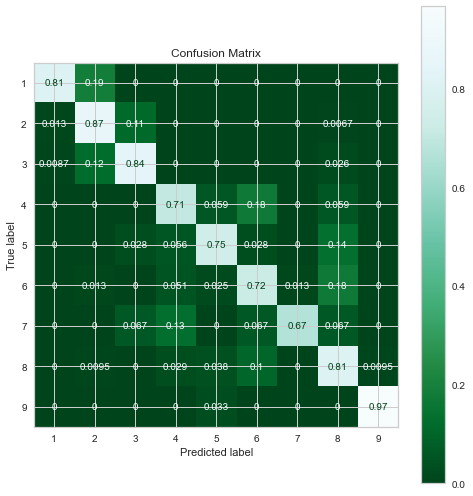

In [143]:
KNN = final_KNN.named_steps['model']
DT = best_DT_quantile.named_steps['model']
RF = best_RF_quantile.named_steps['model']
SVM = best_SVM_power.named_steps['model']

estimators = [('KNN',KNN),('DT',DT),('RF',RF),('SVM',SVM)]
sc = StackingClassifier(estimators)
sc_model = sc.fit(X_train_feature_j_df,y_train_model)
model_evaluation(sc_model,X_validation_feature_j_df,y_validation)

### GridSearchCV for differnt Final Estimators

In [144]:
parameter = {'final_estimator': [LogisticRegression(),AdaBoostClassifier(),RandomForestClassifier()]}
cv_sc = GridSearchCV(sc_model,param_grid = parameter,scoring = 'f1_macro')
cv_sc.fit(X_train_feature_j_df,y_train_model)

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

GridSearchCV(estimator=StackingClassifier(estimators=[('KNN',
                                                       KNeighborsClassifier(n_neighbors=2,
                                                                            weights='distance')),
                                                      ('DT',
                                                       DecisionTreeClassifier(class_weight='balanced',
                                                                              criterion='entropy')),
                                                      ('RF',
                                                       RandomForestClassifier(class_weight='balanced')),
                                                      ('SVM', SVC())]),
             param_grid={'final_estimator': [LogisticRegression(),
                                             AdaBoostClassifier(),
                                             RandomForestClassifier()]},
             scoring='f1_macro')

In [145]:
cv_sc.best_params_

{'final_estimator': RandomForestClassifier()}

In [146]:
y_hat_cv_sc = cv_sc.best_estimator_.predict(X_validation_feature_j_df)
metrics.f1_score(y_validation,y_hat_cv_sc,average='macro')

0.7945913527438869

In [147]:
y_hat_sc = sc_model.predict(X_validation_feature_j_df)
metrics.f1_score(y_validation,y_hat_sc,average='macro')

0.806657778800858

### Visualization

In [148]:
best_SC = cv_sc.best_estimator_


Average f1_score



{'Logistic Classifier': 0.80666, 'RandomForest': 0.79459}

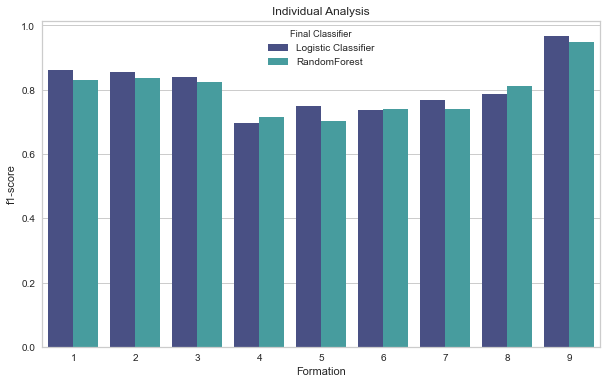

In [149]:
models = [sc_model,best_SC]
description_sc = ['Logistic Classifier','RandomForest']

score_compare(models, X_validation_feature_j_df, y_validation, parameters=description_sc,parameter_name='Final Classifier',
              target_variable='Formation')
f1_compare(models, X_validation_feature_j_df, y_validation, parameters=description_sc)



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


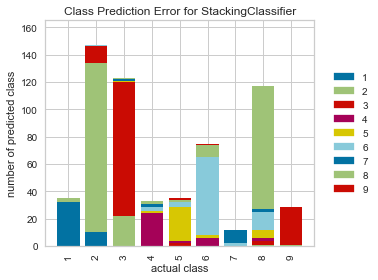



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ValueError: A given column is not a column of the dataframe

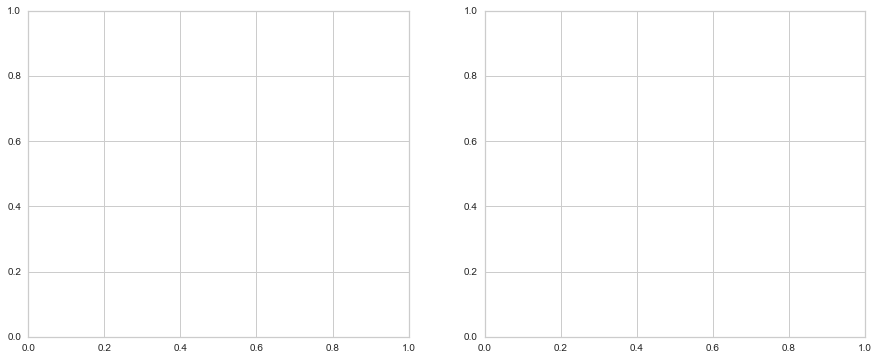

In [150]:
model_visuals(best_SC,X_train_feature_j_df,y_train_model,X_validation_feature_j_df,y_validation,numerical,categorical,cols_j)

FEATURE IMPORTANCES

Feature Importances is not compatable with this classifier


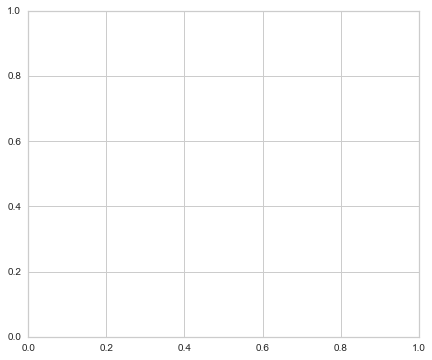

In [151]:
feature_importances(best_SC,X_train_feature_j_df,y_train_model)

In [152]:
explained_weights(best_SC)

Explanation(estimator="StackingClassifier(estimators=[('KNN',\n                                KNeighborsClassifier(n_neighbors=2,\n                                                     weights='distance')),\n                               ('DT',\n                                DecisionTreeClassifier(class_weight='balanced',\n                                                       criterion='entropy')),\n                               ('RF',\n                                RandomForestClassifier(class_weight='balanced')),\n                               ('SVM', SVC())],\n                   final_estimator=RandomForestClassifier())", description=None, error="estimator StackingClassifier(estimators=[('KNN',\n                                KNeighborsClassifier(n_neighbors=2,\n                                                     weights='distance')),\n                               ('DT',\n                                DecisionTreeClassifier(class_weight='balanced',\n                                                       criterion='entropy')),\n                               ('RF',\n                                RandomForestClassifier(class_weight='balanced')),\n                               ('SVM', SVC())],\n                   final_estimator=RandomForestClassifier()) is not supported", method=None, is_regression=False, targets=None, feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## Results and Interpretations

### Best Estimator


Average f1_score



{'KNN': 0.81628, 'DT': 0.71867, 'RF': 0.80022, 'SVM': 0.74951}

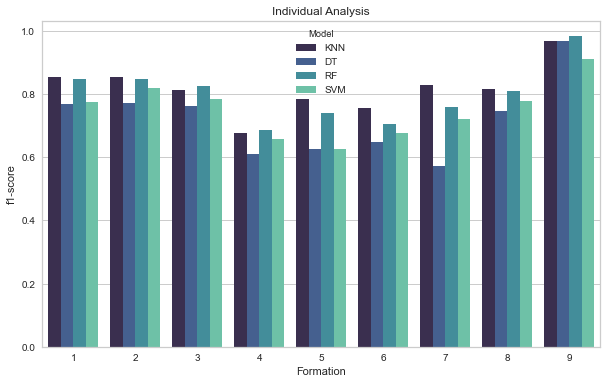

In [154]:
#Best estimator
models = [final_KNN,best_DT_quantile,best_RF_quantile, best_SVM_power]
labeling = ['KNN','DT','RF','SVM']
score_compare(models, X_validation, y_validation, parameters=labeling,parameter_name='Model',
              target_variable='Formation')
f1_compare(models, X_validation, y_validation, parameters=labeling)


Average f1_score



{'KNN': 0.79455, 'DT': 0.40571, 'RF': 0.5566, 'SVM': 0.75708, 'SC': 0.79459}

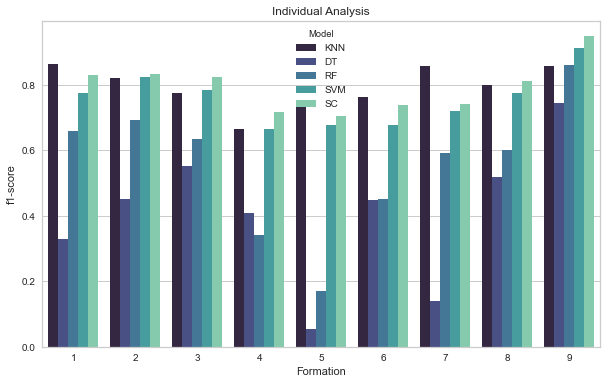

In [155]:
#Best estimator
models = [KNN,DT,RF,SVM,best_SC]
labeling = ['KNN','DT','RF','SVM','SC']
score_compare(models, X_validation_feature_j_df, y_validation, parameters=labeling,parameter_name='Model',
              target_variable='Formation')
f1_compare(models, X_validation_feature_j_df, y_validation, parameters=labeling)


Average f1_score



{'KNN': 0.79455, 'SC': 0.79459}

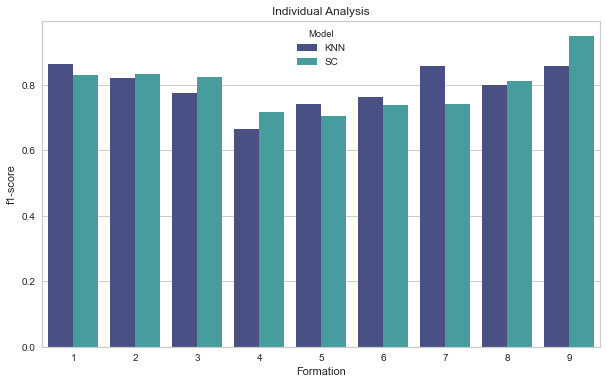

In [156]:
#Best estimator
models = [KNN,best_SC]
labeling = ['KNN','SC']
score_compare(models, X_validation_feature_j_df, y_validation, parameters=labeling,parameter_name='Model',
              target_variable='Formation')
f1_compare(models, X_validation_feature_j_df, y_validation, parameters=labeling)

### Addressing the Class Imbalance

### Best Model Analysis

#### Visuals - KNN



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


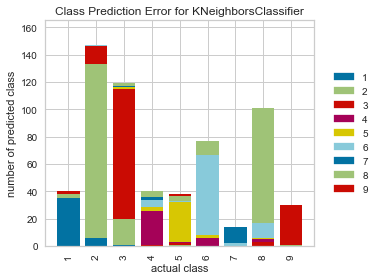



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


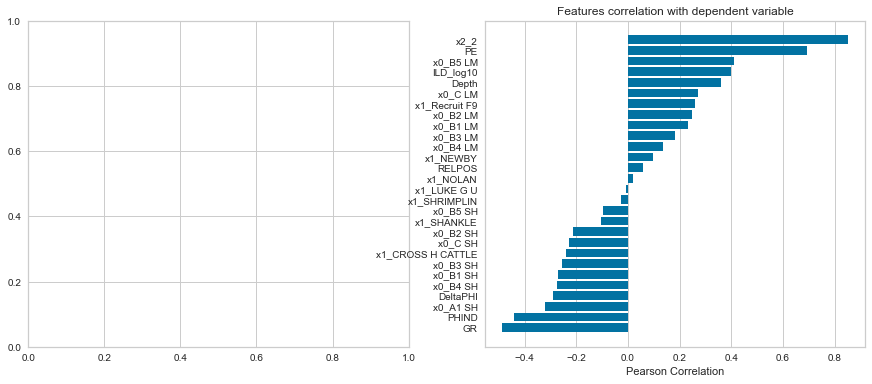

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


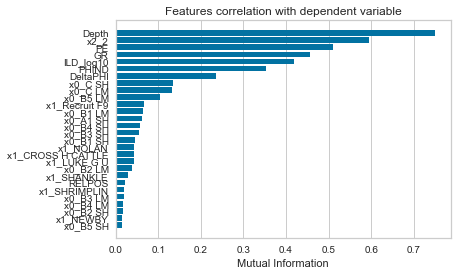



----------------------------------------------------------------------------------------------------


RANK FEATURES



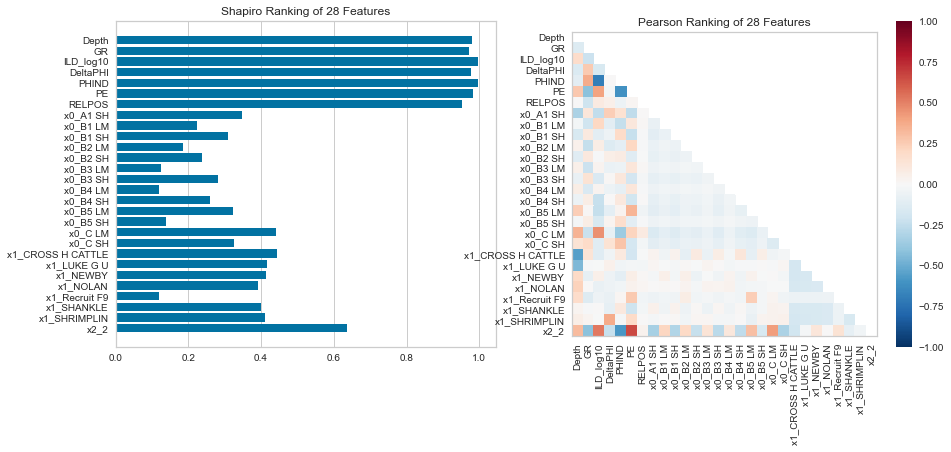

In [157]:
model_visuals(final_KNN,X_train_model,y_train_model,X_validation,y_validation,numerical,categorical,cols_j)

since feature importances and weights do not work with KNN, we will look into the next best mode, RF:

FEATURE IMPORTANCES



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


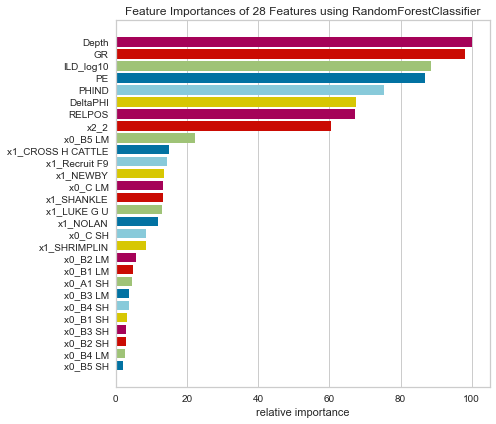

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


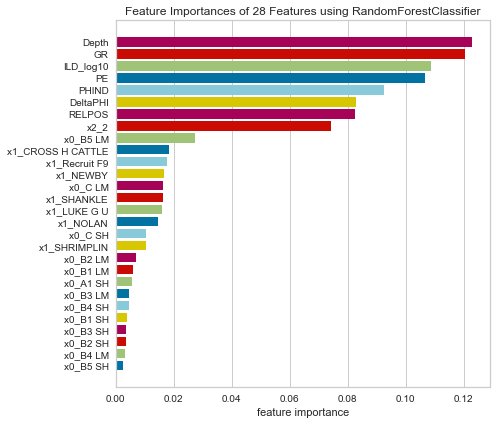

In [158]:
feature_importances(best_RF_quantile.named_steps['model'],X_train_feature_j_df,y_train_model)

In [159]:
explained_weights(best_RF_quantile.named_steps['model'])

Explanation(estimator="RandomForestClassifier(class_weight='balanced')", description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Depth', weight=0.12277434729521991, std=0.024490832794256758, value=None), FeatureWeight(feature='GR', weight=0.1205516426221223, std=0.023133928057798656, value=None), FeatureWeight(feature='ILD_log10', weight=0.10883915423724556, std=0.025785011438921486, value=None), FeatureWeight(feature='PE', weight=0.10666870710783867, std=0.03280663898223614, value=None), FeatureWeight(feature='PHIND', weight=0.09264849482587686, std=0.022529906807801328, value=None), FeatureWeight(feature='DeltaPHI', weight=0.08269437132274256, std=0.020094399987987944, value=None), FeatureWeight(feature='RELPOS', weight=0.08261709611713443, std=0.015841912971759388, value=None), FeatureWeight(feature='x2_2', weight=0.07417123775789813, std=0.028927746696541357, value=None), FeatureWeight(feature='x0_B5 LM', weight=0.027500903651822877, std=0.018217741388480247, value=None), FeatureWeight(feature='x1_CROSS H CATTLE', weight=0.0183070611803328, std=0.010391413152939346, value=None), FeatureWeight(feature='x1_Recruit F9', weight=0.017530470303696206, std=0.015849800559730426, value=None), FeatureWeight(feature='x1_NEWBY', weight=0.01654532400711398, std=0.005899727242547918, value=None), FeatureWeight(feature='x0_C LM', weight=0.016407119121317336, std=0.00852436385011078, value=None), FeatureWeight(feature='x1_SHANKLE', weight=0.016258469052231318, std=0.008004093178146038, value=None), FeatureWeight(feature='x1_LUKE G U', weight=0.016017341383880463, std=0.00858446731533958, value=None), FeatureWeight(feature='x1_NOLAN', weight=0.014643577180438985, std=0.006126996219567856, value=None), FeatureWeight(feature='x0_C SH', weight=0.01044473118196964, std=0.008739732204289306, value=None), FeatureWeight(feature='x1_SHRIMPLIN', weight=0.0103318060629371, std=0.005385046507974025, value=None), FeatureWeight(feature='x0_B2 LM', weight=0.007118577861019125, std=0.005592114289213834, value=None), FeatureWeight(feature='x0_B1 LM', weight=0.0058295947611519475, std=0.0033895462820047414, value=None), FeatureWeight(feature='x0_A1 SH', weight=0.005777589424241452, std=0.004165504070951271, value=None), FeatureWeight(feature='x0_B3 LM', weight=0.004679246102092965, std=0.0036394512177583284, value=None), FeatureWeight(feature='x0_B4 SH', weight=0.004655353153889884, std=0.0045753987917222586, value=None), FeatureWeight(feature='x0_B1 SH', weight=0.0040128448017161585, std=0.0027648982231313606, value=None), FeatureWeight(feature='x0_B3 SH', weight=0.0035130465131397036, std=0.00225611270968193, value=None), FeatureWeight(feature='x0_B2 SH', weight=0.0034932229842347725, std=0.002439414920216603, value=None), FeatureWeight(feature='x0_B4 LM', weight=0.003311267057992411, std=0.0022771389370888633, value=None), FeatureWeight(feature='x0_B5 SH', weight=0.0026574029287025095, std=0.00222370520648229, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

#### Test Data Performance - KNN



MODEL EVALUATION


Classification Report


1           2           3          4          5  \
precision   0.867470    0.891429    0.851613   0.826087   0.763636   
recall      0.986301    0.834225    0.857143   0.826087   0.823529   
f1-score    0.923077    0.861878    0.854369   0.826087   0.792453   
support    73.000000  187.000000  154.000000  46.000000  51.000000   

                    6          7           8          9  accuracy   macro avg  \
precision    0.766129   1.000000    0.816514   0.878049  0.841584    0.851214   
recall       0.826087   0.833333    0.747899   0.923077  0.841584    0.850854   
f1-score     0.794979   0.909091    0.780702   0.900000  0.841584    0.849182   
support    115.000000  24.000000  119.000000  39.000000  0.841584  808.000000   

           weighted avg  
precision      0.843602  
recall         0.841584  
f1-score       0.841322  
support      808.000000



----------------------------------------


Visual Evaluation


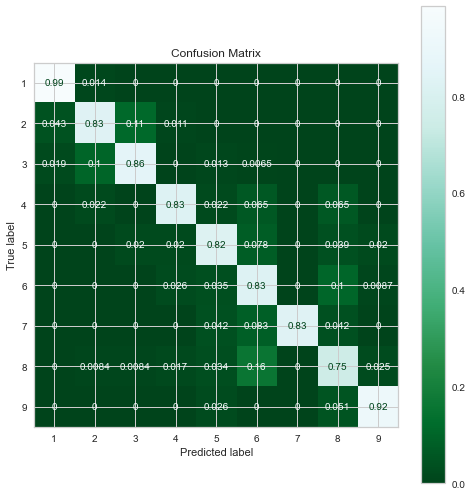

In [160]:
model = final_KNN.fit(X_train,y_train)
model_evaluation(model,X_test,y_test)



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


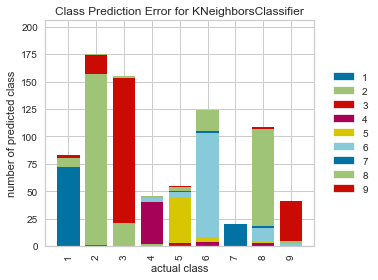



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


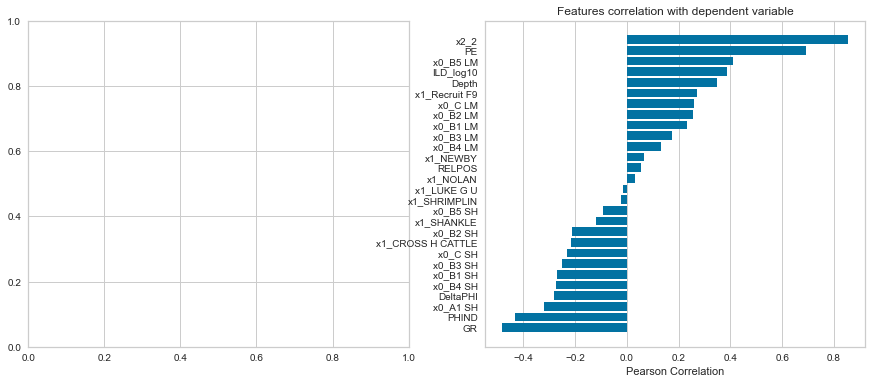

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


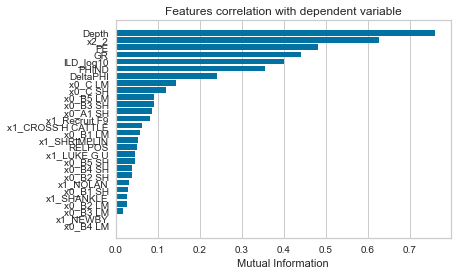



----------------------------------------------------------------------------------------------------


RANK FEATURES



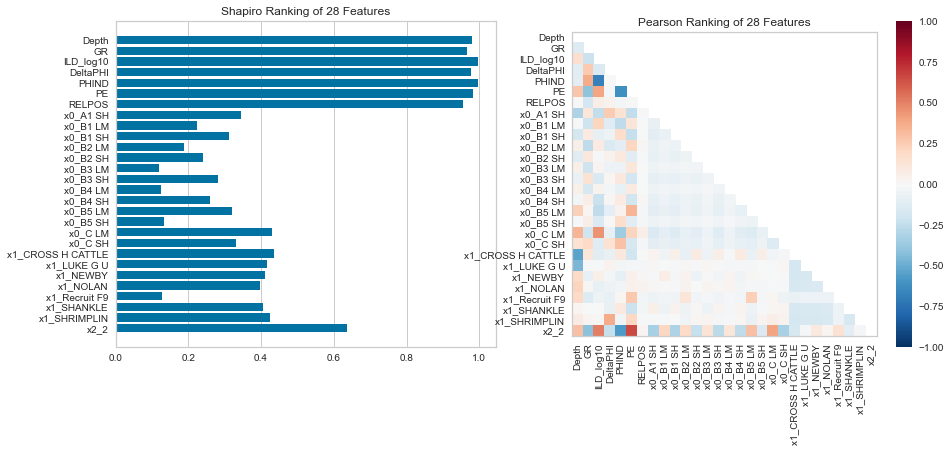

In [161]:
model_visuals(final_KNN,X_train,y_train,X_test,y_test,numerical,categorical,cols_j)

#### Visuals - Stacking Classifier



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


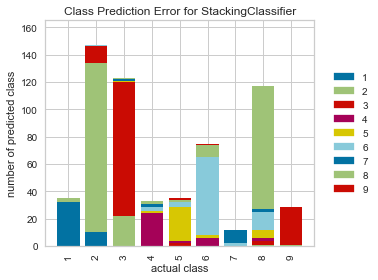



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ValueError: A given column is not a column of the dataframe

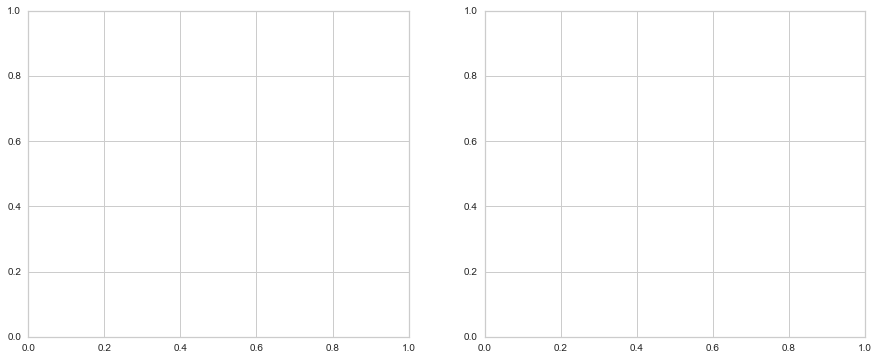

In [162]:
model_visuals(best_SC,X_train_feature_j_df,y_train_model,X_validation_feature_j_df,y_validation,numerical,categorical,cols_j)

Feature Importances with Random Forest - Same as KNN

#### Test Data Performance - Stacking Classifier

In [163]:
X_feature_j_df = preprocessing_trial(numerical,categorical).fit_transform(X_train)
X_feature_j_df = pd.DataFrame(X_feature_j_df,columns = cols_j)
X_feature_j_df

Depth        GR  ILD_log10  DeltaPHI     PHIND        PE    RELPOS  \
0    -0.383249  0.370766   1.196935  0.723798 -0.862826  1.085320 -1.499349   
1    -1.293496  0.657140  -0.082692  0.404771  0.181150 -0.557138  1.504859   
2    -1.557599 -0.002219  -2.597765 -0.283565  0.956953 -1.120785 -1.080350   
3    -0.642844  0.054789  -0.945466  1.074994  0.488653 -0.808662  0.259367   
4     0.943431  0.343020   1.426468 -0.379605 -0.261817  0.627031 -0.946970   
...        ...       ...        ...       ...       ...       ...       ...   
2418 -1.380561  0.544772  -0.270303 -0.741569  1.101626 -0.416619 -0.656296   
2419  0.255780 -1.469398   0.263333 -1.773692  0.151222  0.785759 -0.992578   
2420 -0.593413 -0.024314   1.168196  1.217901 -0.550783 -0.080283  1.253945   
2421 -0.919199  0.492896  -0.983628 -0.964371  1.192424 -0.681731 -0.362987   
2422 -0.055217  0.795920  -0.598898 -1.337212  2.036641 -0.557138 -1.449948   

      x0_A1 SH  x0_B1 LM  x0_B1 SH  ...  x0_C LM  x0_C SH  x1_CROSS H CATTLE  \
0          0.0       0.0       0.0  ...      0.0      0.0                0.0   
1          0.0       0.0       0.0  ...      0.0      0.0                0.0   
2          0.0       0.0       1.0  ...      0.0      0.0                1.0   
3          1.0       0.0       0.0  ...      0.0      0.0                0.0   
4          0.0       1.0       0.0  ...      0.0      0.0                0.0   
...        ...       ...       ...  ...      ...      ...                ...   
2418       0.0       0.0       0.0  ...      0.0      0.0                1.0   
2419       0.0       1.0       0.0  ...      0.0      0.0                0.0   
2420       0.0       0.0       0.0  ...      0.0      0.0                0.0   
2421       0.0       0.0       0.0  ...      0.0      0.0                0.0   
2422       0.0       0.0       0.0  ...      0.0      0.0                0.0   

      x1_LUKE G U  x1_NEWBY  x1_NOLAN  x1_Recruit F9  x1_SHANKLE  \
0             0.0       0.0       0.0            0.0         0.0   
1             1.0       0.0       0.0            0.0         0.0   
2             0.0       0.0       0.0            0.0         0.0   
3             0.0       0.0       0.0            0.0         0.0   
4             0.0       0.0       0.0            0.0         0.0   
...           ...       ...       ...            ...         ...   
2418          0.0       0.0       0.0            0.0         0.0   
2419          0.0       1.0       0.0            0.0         0.0   
2420          0.0       0.0       0.0            0.0         1.0   
2421          1.0       0.0       0.0            0.0         0.0   
2422          0.0       0.0       0.0            0.0         0.0   

      x1_SHRIMPLIN  x2_2  
0              1.0   1.0  
1              0.0   0.0  
2              0.0   0.0  
3              1.0   0.0  
4              0.0   1.0  
...            ...   ...  
2418           0.0   0.0  
2419           0.0   1.0  
2420           0.0   1.0  
2421           0.0   0.0  
2422           1.0   0.0  

[2423 rows x 28 columns]

In [164]:
X_test_feature_j_df = preprocessing_trial(numerical,categorical).fit_transform(X_test)
X_test_feature_j_df = pd.DataFrame(X_test_feature_j_df,columns = cols_j)
X_test_feature_j_df

Depth        GR  ILD_log10  DeltaPHI     PHIND        PE    RELPOS  \
0   -0.510745  2.669226   1.499279  0.245217 -1.136641  0.584939  0.147267   
1   -0.999020 -0.387335  -0.309848 -0.429653  1.007924 -0.332932  1.325913   
2    0.042247  0.539105  -0.543659  1.500941  0.142804 -0.488274  0.339965   
3    1.719350 -0.865721  -1.828758 -0.621603  0.733187  1.293447 -0.424413   
4   -1.855110 -0.027094  -2.287288  0.086639  0.863070 -1.120931 -0.006281   
..        ...       ...        ...       ...       ...       ...       ...   
803 -0.471262  1.310172   1.340905  0.453366 -1.254961  1.847964 -0.269015   
804  1.330145 -1.837644   0.903059 -0.542856 -1.051349 -0.599159  1.445798   
805 -0.819410  1.188114  -0.604110 -2.404358  2.041976 -1.406452  1.489707   
806  0.284084 -2.315179   0.958857  0.833778 -1.778578  0.123959  0.240548   
807  0.570032 -0.735848   2.074510 -0.503873 -1.614984  1.452540 -0.633687   

     x0_A1 SH  x0_B1 LM  x0_B1 SH  ...  x0_C LM  x0_C SH  x1_CROSS H CATTLE  \
0         0.0       0.0       0.0  ...      1.0      0.0                1.0   
1         0.0       0.0       0.0  ...      0.0      0.0                1.0   
2         0.0       0.0       0.0  ...      0.0      0.0                0.0   
3         0.0       0.0       0.0  ...      0.0      0.0                0.0   
4         1.0       0.0       0.0  ...      0.0      0.0                1.0   
..        ...       ...       ...  ...      ...      ...                ...   
803       0.0       0.0       0.0  ...      0.0      0.0                0.0   
804       0.0       0.0       0.0  ...      1.0      0.0                0.0   
805       0.0       0.0       0.0  ...      0.0      1.0                1.0   
806       0.0       0.0       0.0  ...      0.0      0.0                0.0   
807       0.0       0.0       0.0  ...      0.0      0.0                0.0   

     x1_LUKE G U  x1_NEWBY  x1_NOLAN  x1_Recruit F9  x1_SHANKLE  x1_SHRIMPLIN  \
0            0.0       0.0       0.0            0.0         0.0           0.0   
1            0.0       0.0       0.0            0.0         0.0           0.0   
2            0.0       0.0       0.0            0.0         0.0           1.0   
3            0.0       0.0       0.0            0.0         0.0           0.0   
4            0.0       0.0       0.0            0.0         0.0           0.0   
..           ...       ...       ...            ...         ...           ...   
803          0.0       0.0       0.0            0.0         0.0           1.0   
804          0.0       0.0       1.0            0.0         0.0           0.0   
805          0.0       0.0       0.0            0.0         0.0           0.0   
806          0.0       0.0       0.0            0.0         1.0           0.0   
807          0.0       0.0       0.0            0.0         0.0           0.0   

     x2_2  
0     1.0  
1     1.0  
2     0.0  
3     1.0  
4     0.0  
..    ...  
803   1.0  
804   1.0  
805   0.0  
806   1.0  
807   1.0  

[808 rows x 28 columns]



MODEL EVALUATION


Classification Report


1           2           3          4          5  \
precision   0.909091    0.920904    0.875000   0.886364   0.800000   
recall      0.958904    0.871658    0.909091   0.847826   0.784314   
f1-score    0.933333    0.895604    0.891720   0.866667   0.792079   
support    73.000000  187.000000  154.000000  46.000000  51.000000   

                    6          7           8          9  accuracy   macro avg  \
precision    0.793388   0.900000    0.778689   0.945946  0.861386    0.867709   
recall       0.834783   0.750000    0.798319   0.897436  0.861386    0.850259   
f1-score     0.813559   0.818182    0.788382   0.921053  0.861386    0.857842   
support    115.000000  24.000000  119.000000  39.000000  0.861386  808.000000   

           weighted avg  
precision      0.862984  
recall         0.861386  
f1-score       0.861551  
support      808.000000



----------------------------------------


Visual Evaluation


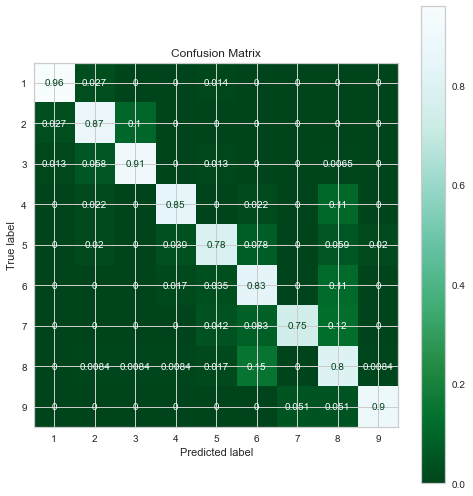

In [165]:
model = best_SC.fit(X_feature_j_df,y_train)
model_evaluation(model,X_test_feature_j_df,y_test)



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


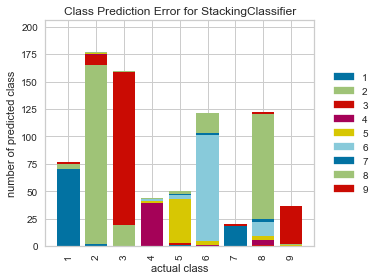



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ValueError: A given column is not a column of the dataframe

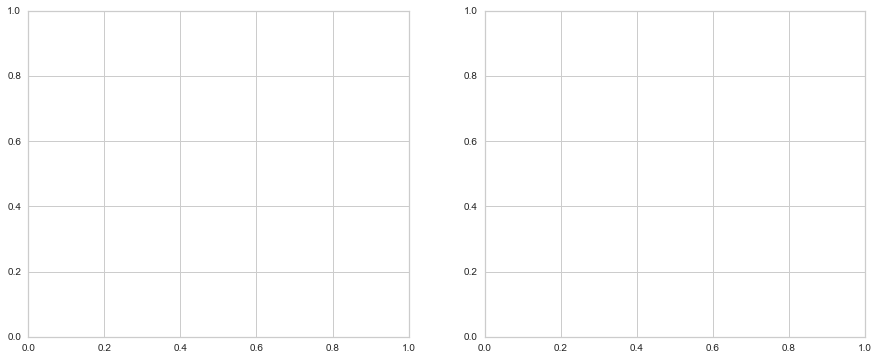

In [166]:
model_visuals(best_SC,X_feature_j_df,y_train,X_test_feature_j_df,y_test,numerical,categorical,cols_j)

### Model Interpretation

#### Target relation

In [167]:
df

Facies Formation        Well Name   Depth      GR  ILD_log10  DeltaPHI  \
0          3     A1 SH        SHRIMPLIN  2793.0  77.450      0.664     9.900   
1          3     A1 SH        SHRIMPLIN  2793.5  78.260      0.661    14.200   
2          3     A1 SH        SHRIMPLIN  2794.0  79.050      0.658    14.800   
3          3     A1 SH        SHRIMPLIN  2794.5  86.100      0.655    13.900   
4          3     A1 SH        SHRIMPLIN  2795.0  74.580      0.647    13.500   
...      ...       ...              ...     ...     ...        ...       ...   
3227       5      C LM  CHURCHMAN BIBLE  3120.5  46.719      0.947     1.828   
3228       5      C LM  CHURCHMAN BIBLE  3121.0  44.563      0.953     2.241   
3229       5      C LM  CHURCHMAN BIBLE  3121.5  49.719      0.964     2.925   
3230       5      C LM  CHURCHMAN BIBLE  3122.0  51.469      0.965     3.083   
3231       5      C LM  CHURCHMAN BIBLE  3122.5  50.031      0.970     2.609   

       PHIND     PE  NM_M  RELPOS  
0     11.915  4.600     1   1.000  
1     12.565  4.100     1   0.979  
2     13.050  3.600     1   0.957  
3     13.115  3.500     1   0.936  
4     13.300  3.400     1   0.915  
...      ...    ...   ...     ...  
3227   7.254  3.617     2   0.685  
3228   8.013  3.344     2   0.677  
3229   8.013  3.190     2   0.669  
3230   7.708  3.152     2   0.661  
3231   6.668  3.295     2   0.653  

[3231 rows x 11 columns]

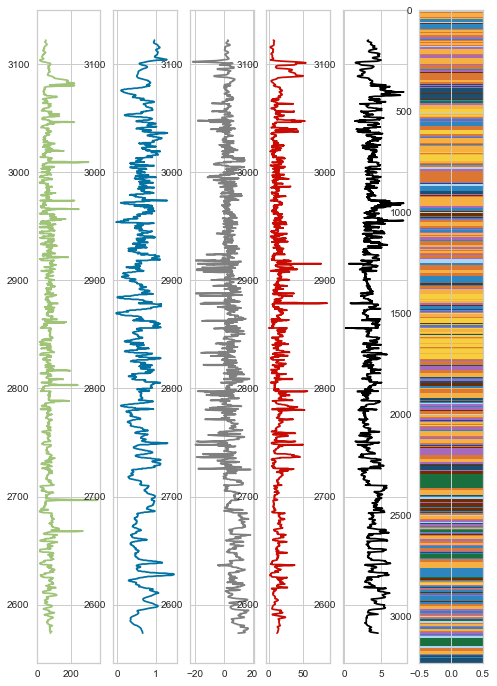

In [224]:
f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
ax[0].plot(df.GR, df.Depth.sort_values(), '-g')
ax[1].plot(df.ILD_log10, df.Depth.sort_values(), '-')
ax[2].plot(df.DeltaPHI, df.Depth.sort_values(), '-', color='0.5')
ax[3].plot(df.PHIND, df.Depth.sort_values(), '-', color='r')
ax[4].plot(df.PE, df.Depth.sort_values(), '-', color='black')
ax[5].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap,
                    vmin=1,vmax=9)
# plt.tight_layout

In [205]:
df_viz = df.sort_values(by='Depth')

In [211]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

In [213]:
cmap = mpl.colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

In [206]:
cluster = np.expand_dims(df['Facies'].values,1)

(2573.5, 3122.5)

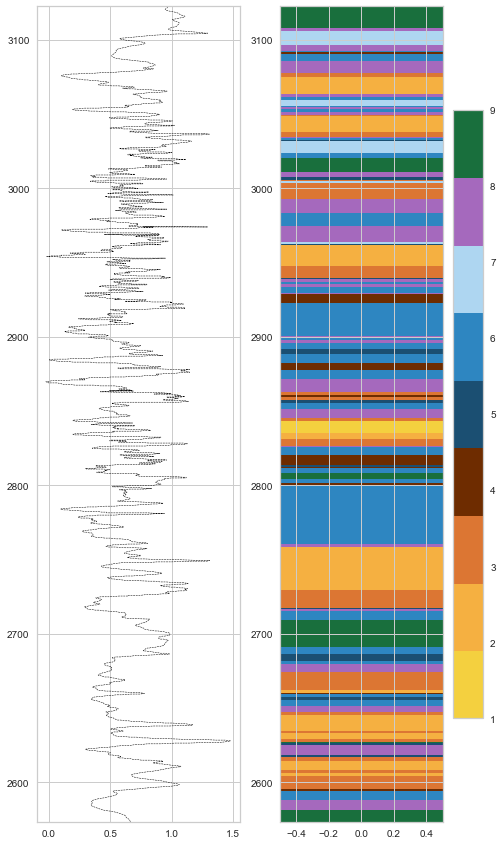

In [223]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 15))
ax[0].plot(df.ILD_log10, df.Depth.sort_values(), '--',color='black',linewidth=0.5)
im = ax[1].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap,
                    vmin=1,vmax=9)
cbar=plt.colorbar(im)
ax[1].set_ylim(df_viz.Depth.min(),df_viz.Depth.max())
ax[0].set_ylim(df_viz.Depth.min(),df_viz.Depth.max())

In [241]:
# @interact(x=df_viz.copy().select_dtypes(np.number).drop('Facies',axis=1).columns,y='Depth')
# def plots(x,y):
#     f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 15))
#     ax[0].plot(df_viz[x], df_viz[y], '--',color='black',linewidth=0.5)
#     im = ax[1].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap,vmin=1,vmax=9)
#     cbar=plt.colorbar(im)
#     ax[1].set_ylim(df_viz[y].min(),df_viz[y].max())
#     ax[0].set_ylim(df_viz[y].min(),df_viz[y].max())
   

In [261]:
def plots(x,y):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 15))
    ax[0].plot(df_viz[x], df_viz[y].sort_values(), '--',color='black',linewidth=0.5)
    im = ax[1].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap,vmin=1,vmax=9)
    cbar=plt.colorbar(im)
    ax[1].set_ylim(df_viz[y].min(),df_viz[y].max())
    ax[0].set_ylim(df_viz[y].min(),df_viz[y].max())

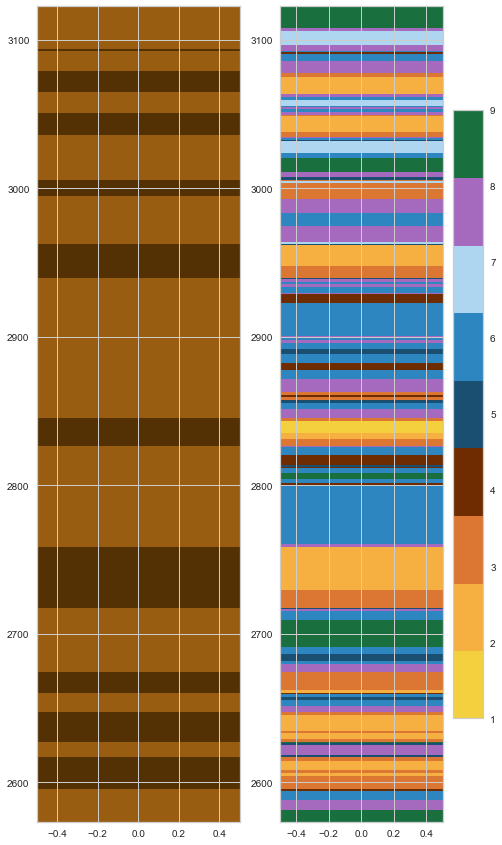

In [281]:
nm_cluster=np.expand_dims(df['NM_M'].values,1)
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 15))
ax[0].imshow(nm_cluster, interpolation='none', aspect='auto',cmap='BrBG',
                    vmin=1,vmax=9)
im = ax[1].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap,
                    vmin=1,vmax=9)
cbar=plt.colorbar(im)
ax[1].set_ylim(df_viz.Depth.min(),df_viz.Depth.max())
ax[0].set_ylim(df_viz.Depth.min(),df_viz.Depth.max());

# plt.savefig('NM_M-relation.png',transparent = True)

In [259]:
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

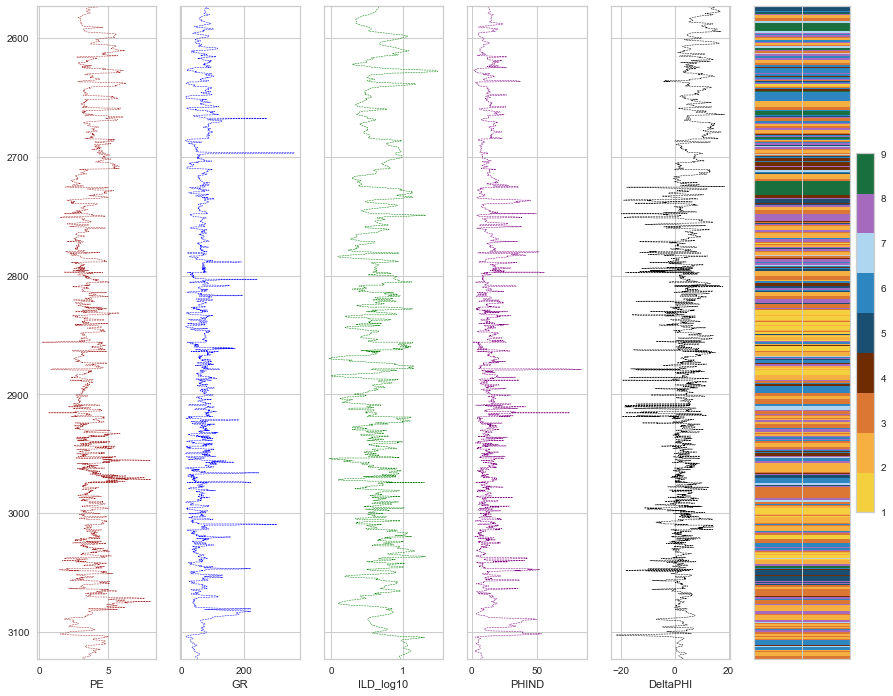

In [280]:
fig,ax = plt.subplots(nrows=1, ncols=6, figsize=(15, 12))
colors = ['brown','blue','green','purple','black']
features  = ['PE','GR','ILD_log10','PHIND','DeltaPHI']
for i in range(5):
    ax[i].plot(df[features[i]], df.Depth.sort_values(), '--',color=colors[i],linewidth=0.5)
    ax[i].set_ylim(df_viz.Depth.min(),df_viz.Depth.max())
    ax[i].invert_yaxis()
    ax[i].locator_params(axis='x',nbins=3)
    ax[i].set_xlabel(features[i])
    
ax[5].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap,vmin=1,vmax=9)
cbar=plt.colorbar(im)
ax[5].invert_yaxis()

ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[3].set_yticklabels([])
ax[4].set_yticklabels([])
ax[5].set_yticklabels([])
ax[5].set_xticklabels([]);

# plt.savefig('logs.png',transparent=True)

### Results

## Conclusions

## Recommendations

## Future Work